<a href="https://colab.research.google.com/github/renaldoaluska/pba2025gasal/blob/main/PBA_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5026221144

Alfa Renaldo Aluska

PBA GASAL 2025

# INITIAL REQUIREMENTS
WEEK 2: Data Scrapping Application (1), Data Preprocessing Application: Frequent Word Analysis (2) Bertokenizer (Stopword removal/ Stopword customs (WEEK2 RECAP) (3)

In [44]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

# DATA SCRAPPING

## GPlay Scrapper

In [45]:
#Android App TransJogja  from Google Play at
#https://play.google.com/store/apps/details?id=ngi.transjogja.apppublic&hl=id
#ID Apps:
#The apps ID found in the link after id=ngi.transjogja.apppublic

from google_play_scraper import app, Sort, reviews_all

transjog_reviews = reviews_all(
    'ngi.transjogja.apppublic',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [46]:
transjog_reviews[:3]

[{'reviewId': '8d481456-2cb7-45eb-bdeb-4476ee1ca87f',
  'userName': 'Rachmat Mubarok',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjW1QqPT3hy31us09mx-f8sg-l73nkhyZHjBX7OLrsumklwiqvY',
  'content': 'sangat membantu',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.5',
  'at': datetime.datetime(2025, 9, 21, 11, 44, 22),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.5'},
 {'reviewId': '6635e25d-8860-4223-ae2c-1b5fec776778',
  'userName': 'Yazeed Amar',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocI8A3ySdMo1LKaY9F0Mjhulz-f5eD5GvebVWU3dFxJZPBdg0w=mo',
  'content': 'mntap',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.5',
  'at': datetime.datetime(2025, 9, 21, 7, 25, 55),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.5'},
 {'reviewId': '457c1899-6ff1-4365-ab7d-118738e65628',
  'userName': 'Etriyanto Damanik',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVLsJjz

## Ethics: sensor userName

In [47]:
# Lakukan iterasi dan ubah 'userName'
# Ini adalah cara yang paling efisien menggunakan list comprehension
reviews_tersensor = [
    {**review, 'userName': 'Pengguna Google'} for review in transjog_reviews
]

# Sekarang, 'reviews_tersensor' berisi data yang sama,
# tapi semua nama pengguna sudah diubah.

# Mari kita lihat perbedaannya
if transjog_reviews:
    print("--- DATA ASLI ---")
    print(f"Username: {transjog_reviews[0]['userName']}")
    print(f"Review: {transjog_reviews[0]['content']}\n")

if reviews_tersensor:
    print("--- DATA SETELAH DISENSOR ---")
    print(f"Username: {reviews_tersensor[0]['userName']}")
    print(f"Review: {reviews_tersensor[0]['content']}")

--- DATA ASLI ---
Username: Rachmat Mubarok
Review: sangat membantu

--- DATA SETELAH DISENSOR ---
Username: Pengguna Google
Review: sangat membantu


## Into dataframe

In [48]:
#Save TransJogja reviews into dataframe
df_transjog = pd.DataFrame(np.array(reviews_tersensor),columns=['content'])
df_transjog = df_transjog.join(pd.DataFrame(df_transjog.pop('content').tolist()))
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8d481456-2cb7-45eb-bdeb-4476ee1ca87f,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjW1QqPT3hy31us09mx-f8sg-l73nkhyZHjBX7OLrsumklwiqvY,sangat membantu,5,0,2.3.5,2025-09-21 11:44:22,None,NaT,2.3.5
1,6635e25d-8860-4223-ae2c-1b5fec776778,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocI8A3ySdMo1LKaY9F0Mjhulz-f5eD5GvebVWU3dFxJZPBdg0w=mo,mntap,5,0,2.3.5,2025-09-21 07:25:55,None,NaT,2.3.5
2,457c1899-6ff1-4365-ab7d-118738e65628,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjVLsJjziVkjdNpi_h3vJZCF5W1fndamqGlOlW-3LIqqL3vrG0rR8A,membantu sekali baik,5,0,2.3.5,2025-09-21 05:03:59,None,NaT,2.3.5
3,d7afd922-1650-4c04-a8c6-273539d969a1,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjWl6qzrT15C_PXkhAwG-mKf7J6nnbsDnu4EjzsmIVY6eTB1O38,ngeleg,1,0,2.3.5,2025-09-18 07:57:40,None,NaT,2.3.5
4,b43d5ee7-4619-4195-a0fd-44dfb8e75b65,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocKMjwsjt94uzv-3po2hwTEU5TjY493YHrm-vj0oHtNq1KISfA=mo,sangat Membantu sekali 👍👍👍👍👍,5,0,2.3.5,2025-09-17 16:08:37,None,NaT,2.3.5
...,...,...,...,...,...,...,...,...,...,...,...
332,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Work banget sih, wajar laah kalo banyak kendala, masi baru jugak... Semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0
333,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT,None
334,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Install >> lihat instruksi >> harus login ? >> Uninstall,5,1,None,2020-01-30 08:57:06,None,NaT,None
335,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT,1.0


## Simpan csv raw

In [49]:

df_transjog.to_csv(r'df_transjog_raw.csv', index=False)

In [50]:
df_transjog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              337 non-null    object        
 1   userName              337 non-null    object        
 2   userImage             337 non-null    object        
 3   content               337 non-null    object        
 4   score                 337 non-null    int64         
 5   thumbsUpCount         337 non-null    int64         
 6   reviewCreatedVersion  268 non-null    object        
 7   at                    337 non-null    datetime64[ns]
 8   replyContent          12 non-null     object        
 9   repliedAt             12 non-null     datetime64[ns]
 10  appVersion            268 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 29.1+ KB


## Loc yang perlu saja

In [51]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
#df_analysis = df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,sangat membantu,5,0,2.3.5,2025-09-21 11:44:22,None,NaT
1,mntap,5,0,2.3.5,2025-09-21 07:25:55,None,NaT
2,membantu sekali baik,5,0,2.3.5,2025-09-21 05:03:59,None,NaT
3,ngeleg,1,0,2.3.5,2025-09-18 07:57:40,None,NaT
4,sangat Membantu sekali 👍👍👍👍👍,5,0,2.3.5,2025-09-17 16:08:37,None,NaT
...,...,...,...,...,...,...,...
332,"Work banget sih, wajar laah kalo banyak kendala, masi baru jugak... Semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10
333,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT
334,Install >> lihat instruksi >> harus login ? >> Uninstall,5,1,None,2020-01-30 08:57:06,None,NaT
335,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT


## Cek score (rating)

In [52]:
#Check number of reviews scores
df_transjog['score'].value_counts()

,count
score,
5,167
1,67
4,39
3,34
2,30


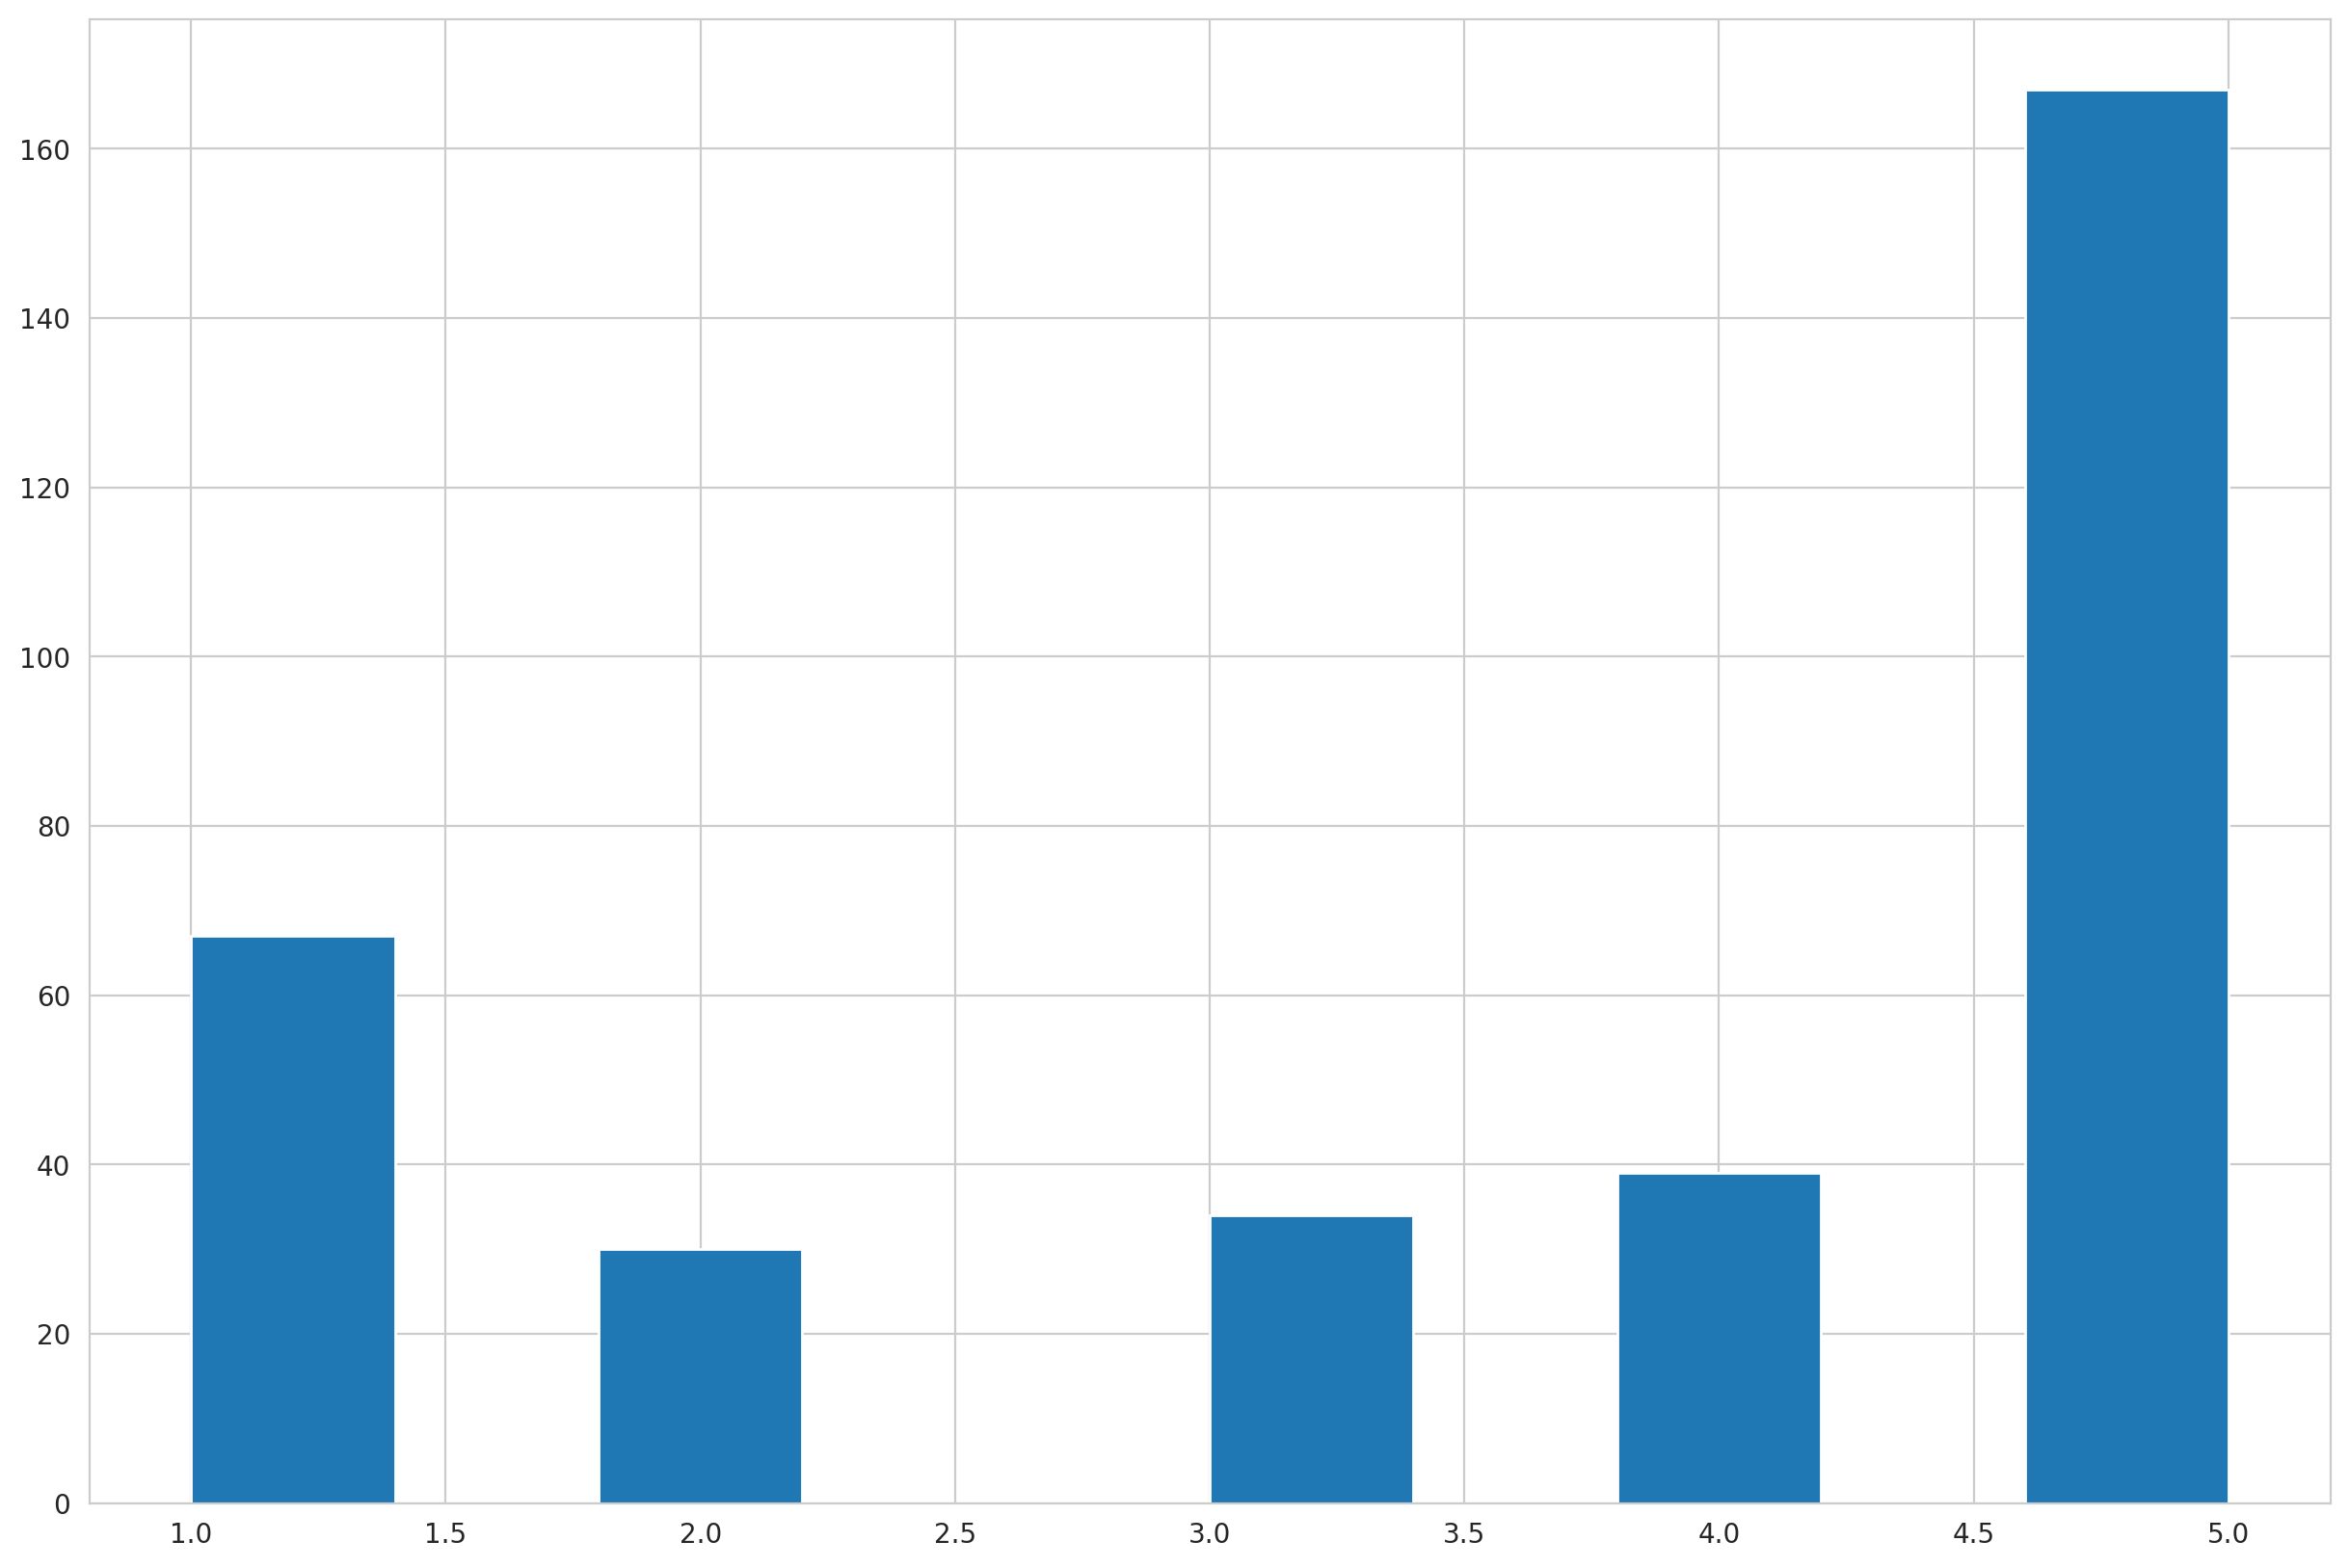

In [53]:
plt.hist(df_transjog['score'])
plt.show()

# DATA PREPROCESSING

## PEMROSESAN AWAL

### Hapus emoji

In [54]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

In [55]:
# Buat fungsi untuk menghapus emoji
def hapus_emoji(text):
  # Ganti emoji dengan string kosong ''
  return emoji.replace_emoji(text, replace='')

# Terapkan fungsi ke kolom yang berisi teks
df_transjog['content'] = df_transjog['content'].apply(hapus_emoji)

# Lihat hasilnya
print(df_transjog)

                                 reviewId         userName  \
0    8d481456-2cb7-45eb-bdeb-4476ee1ca87f  Pengguna Google   
1    6635e25d-8860-4223-ae2c-1b5fec776778  Pengguna Google   
2    457c1899-6ff1-4365-ab7d-118738e65628  Pengguna Google   
3    d7afd922-1650-4c04-a8c6-273539d969a1  Pengguna Google   
4    b43d5ee7-4619-4195-a0fd-44dfb8e75b65  Pengguna Google   
..                                    ...              ...   
332  27d478d3-67b9-4fa6-99ca-1f779a50d042  Pengguna Google   
333  2c7359e3-c29b-4f75-8b8f-fd4c69715d60  Pengguna Google   
334  9fa31a1c-3c49-4bad-ad30-2203d9be5c02  Pengguna Google   
335  83d95da2-316a-4bc2-b113-42d27b3c0663  Pengguna Google   
336  021c984c-cbee-4700-bbdf-452b2fe36918  Pengguna Google   

                                                                                                                    userImage  \
0                            https://play-lh.googleusercontent.com/a-/ALV-UjW1QqPT3hy31us09mx-f8sg-l73nkhyZHjBX7OLrsumklwiqvY 

### Jadiin lowercase

In [56]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_transjog['content'] = df_transjog['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_transjog['content'][90])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

BAGUS
mntap
Kecewa, saya lagi buru2 bisa bisanya bis no 9 gk berhenti di wojo, intinya kernet bis nya suruh buka mata kalo ada halte


In [57]:
#Lowercase all reviews to see the difference
df_transjog['content']= df_transjog['content'].apply(lambda x: x.lower())
print(df_transjog['content'][100])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

update bikin ngelag
mntap
kecewa, saya lagi buru2 bisa bisanya bis no 9 gk berhenti di wojo, intinya kernet bis nya suruh buka mata kalo ada halte


## NORMALISASI

### Ngecek frequent words

,Word,Frequency
0,di,114
1,bus,77
2,sangat,76
3,dan,72
4,ada,67
5,tidak,64
6,yang,62
7,saya,62
8,untuk,59
9,bisa,58


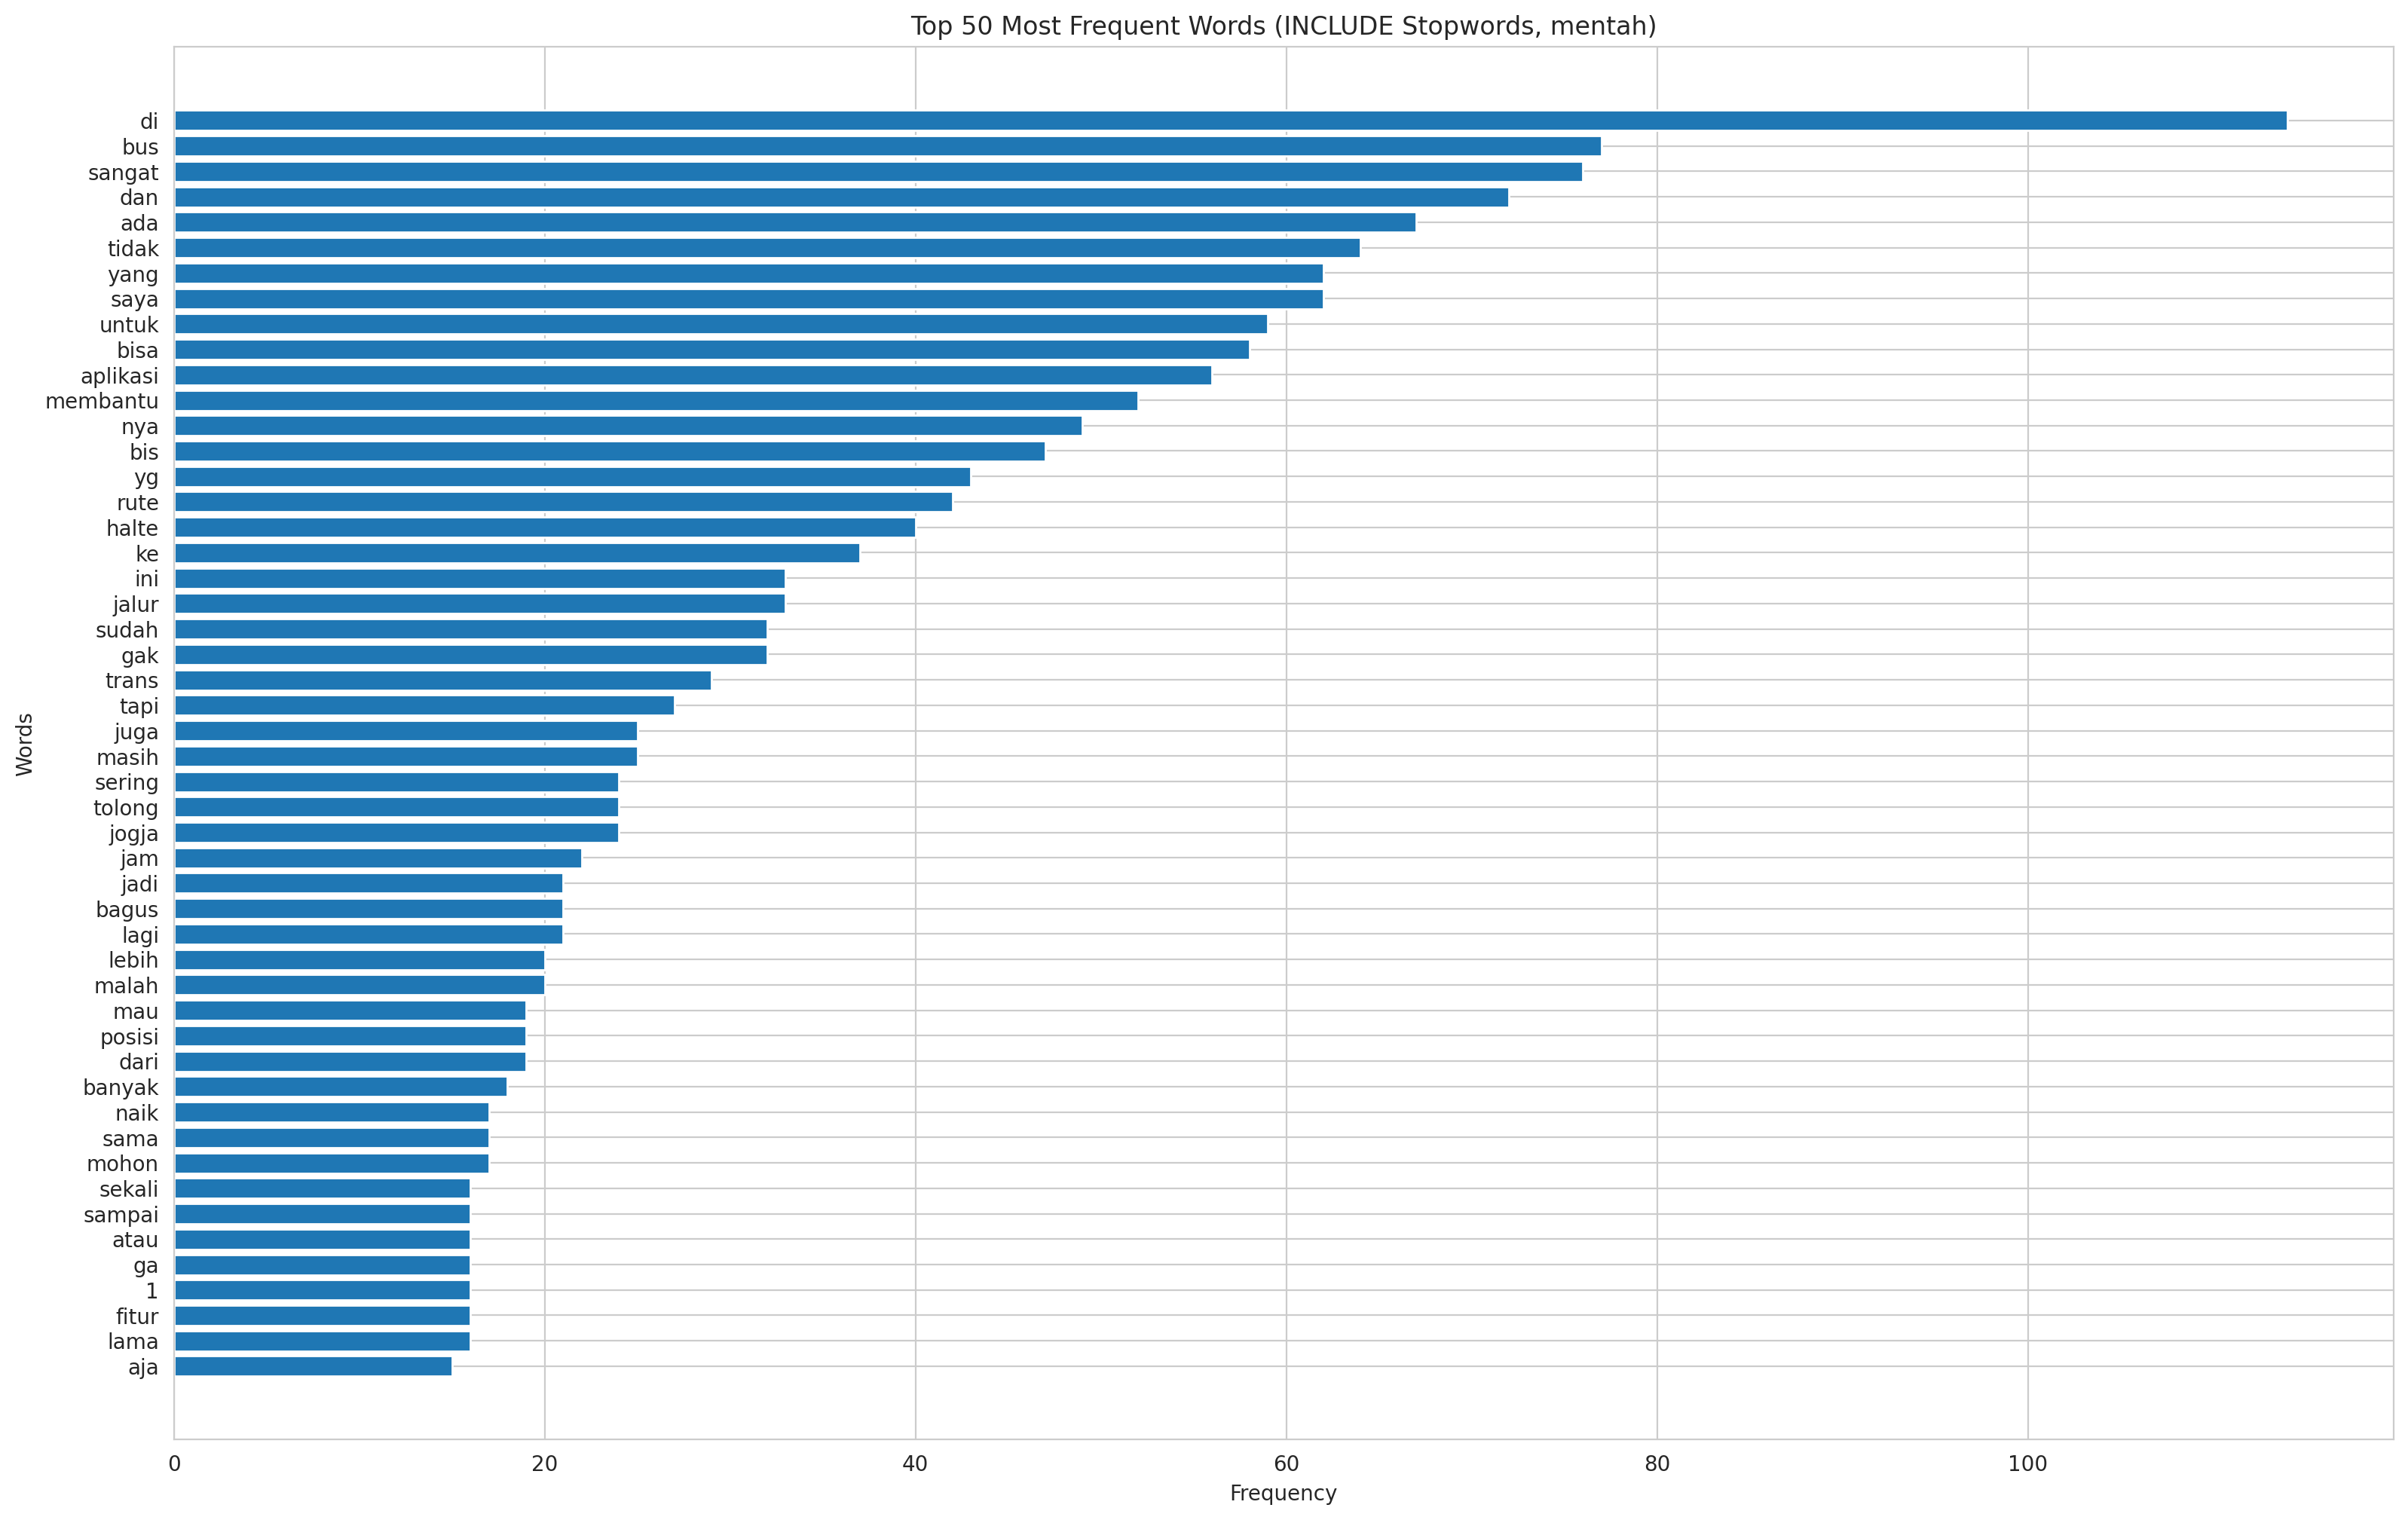

In [58]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

### Ngecek least words

,Word,Frequency
0,min.l,1
1,disempurnakan,1
2,yaa...,1
3,tji,1
4,instruksi,1
5,inovasi,1
6,kembangkan!,1
7,semangat,1
8,jugak...,1
9,masi,1


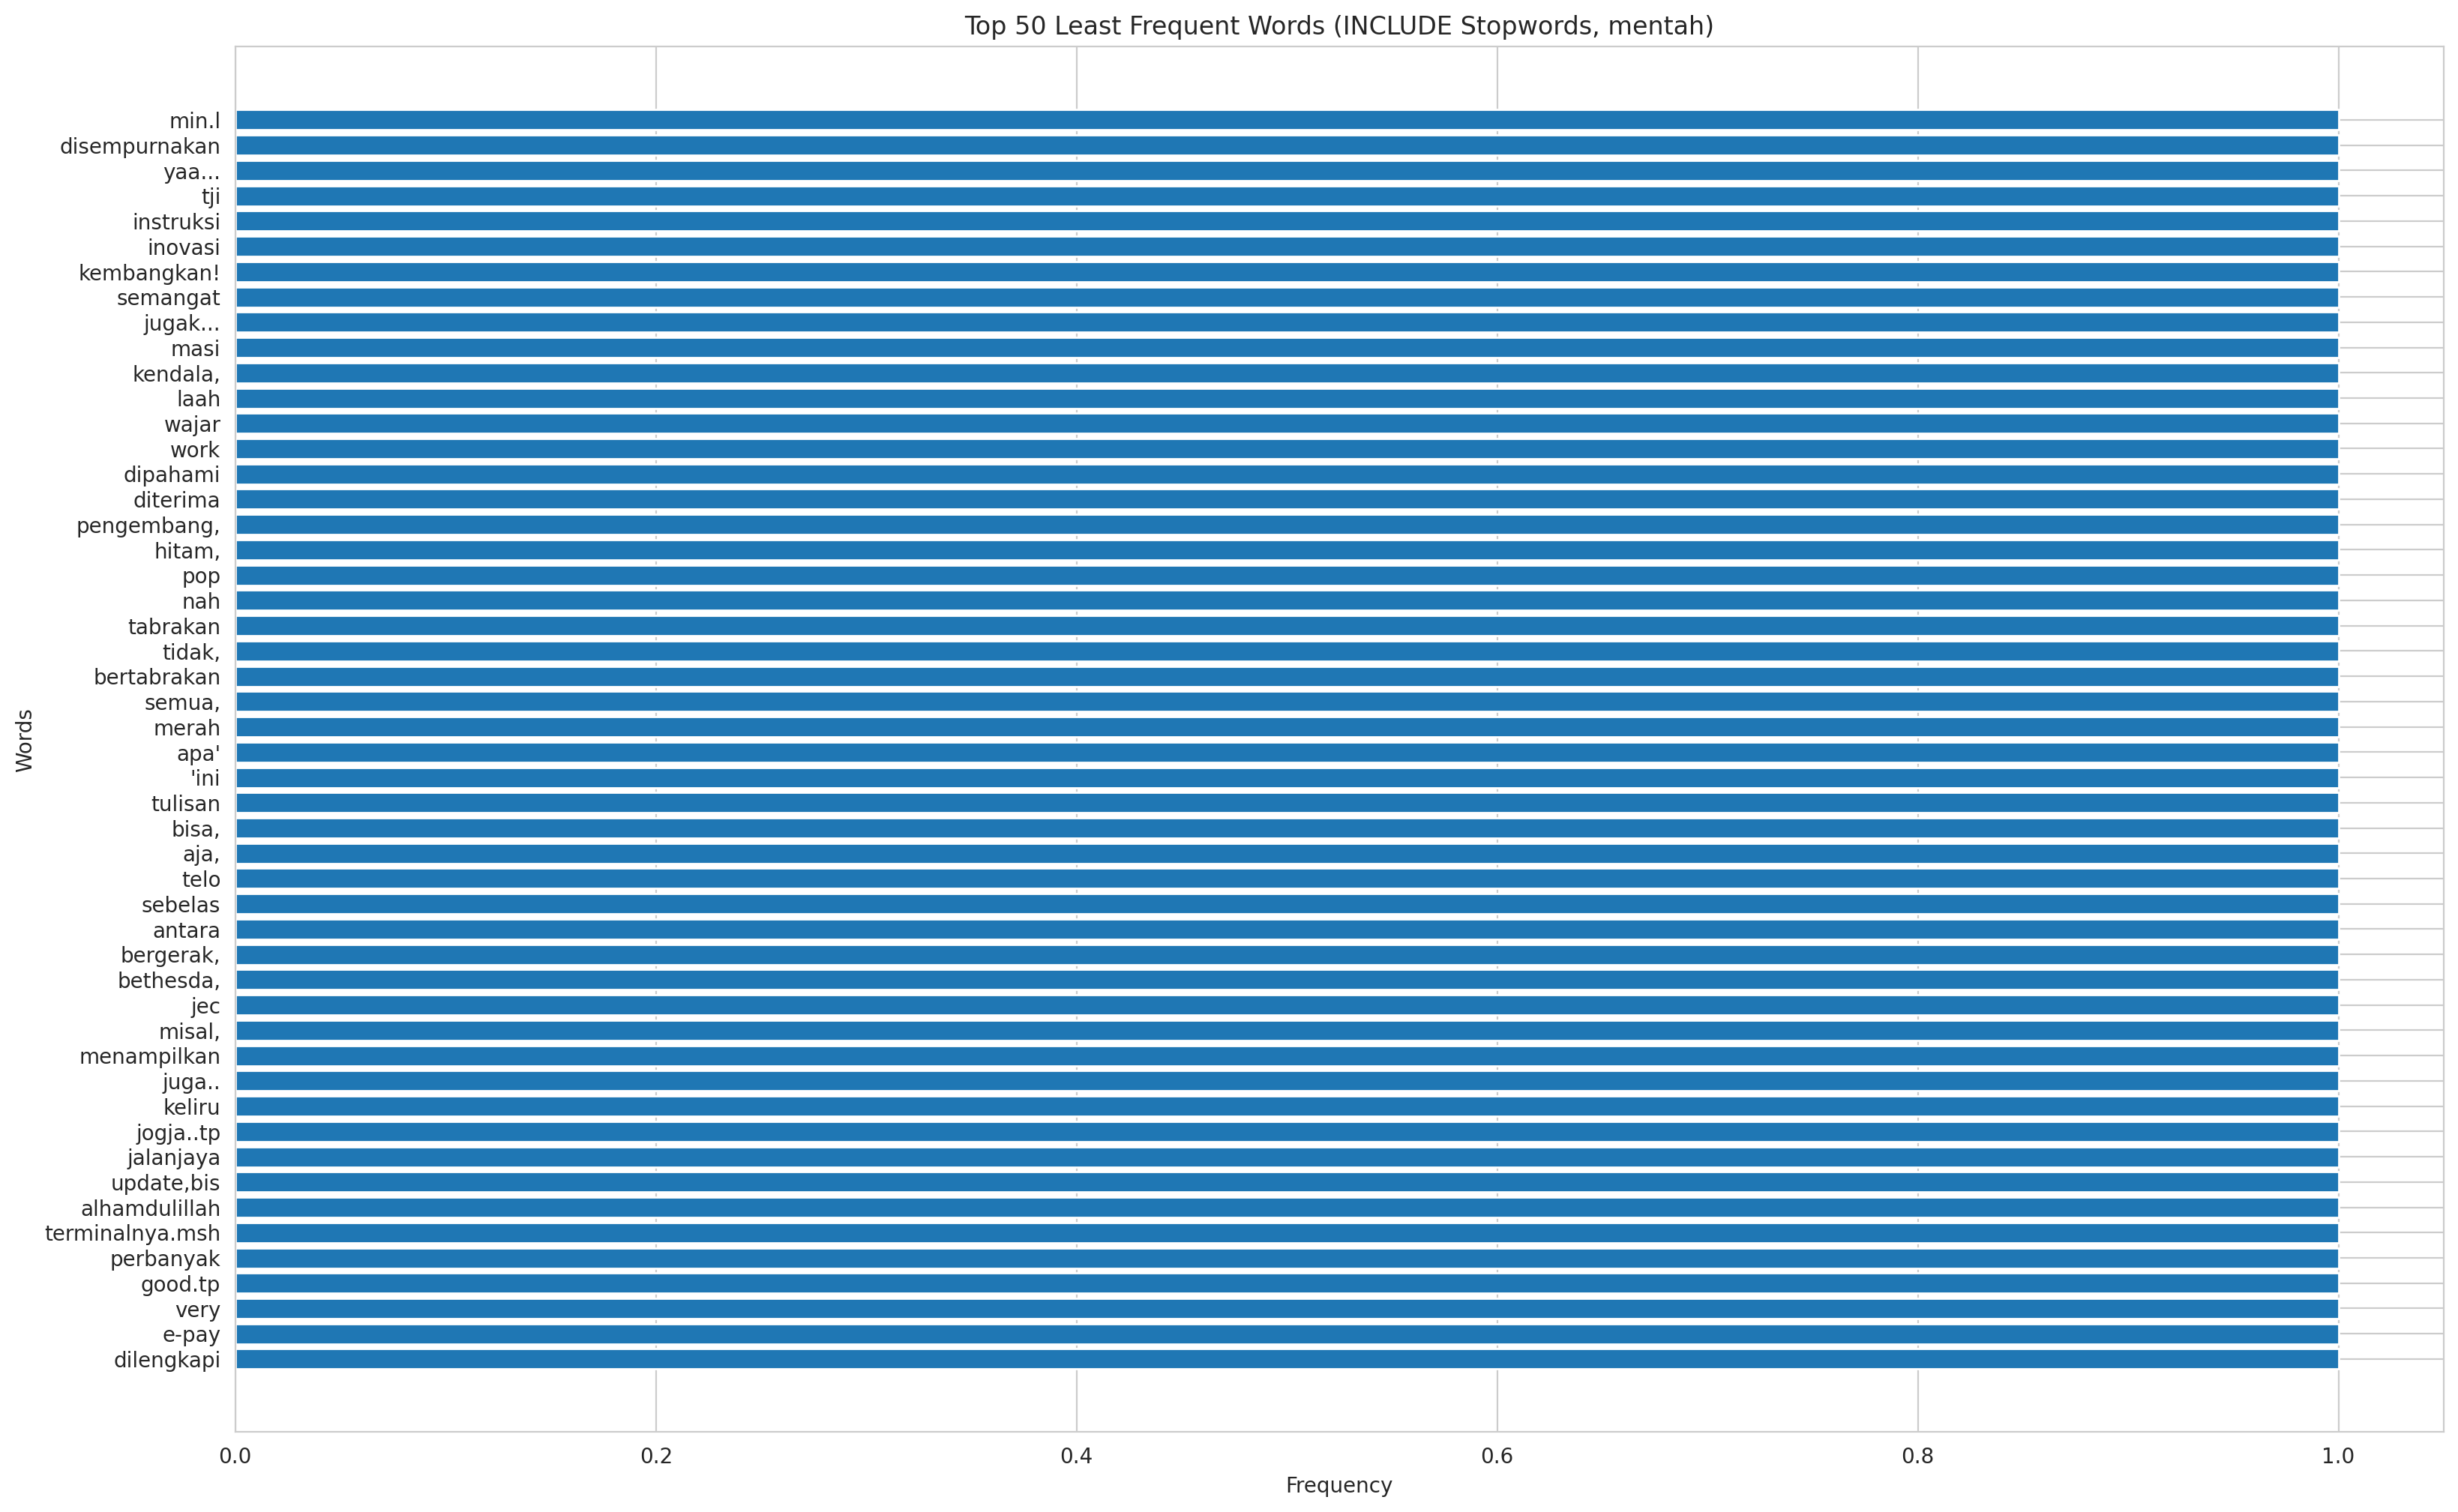

In [59]:
# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


### Regex in action

In [60]:
import pandas as pd
import re
from collections import Counter

# Asumsikan Anda sudah memiliki DataFrame 'df_transjog' dengan kolom 'content'
# Contoh pembuatan DataFrame jika belum ada:
# data = {'content': ['Aplikasi bisnya error dan sering telat',
#                      'terima kasih, app ini sangat membantu. mantap!',
#                      'jadwal tj tidak akurat, mohon perbaiki']}
# df_transjog = pd.DataFrame(data)

# --- LANGKAH 1: PERSIAPAN (KAMUS NORMALISASI) ---

# Buat kamus untuk standardisasi, slang, dan singkatan
normalization_dict = {
    # Normalisasi Kata (termasuk variasi dengan imbuhan)
    r'\b(bis|bisnya|busnya)\b': 'bus',
    r'\b(aplikasinya|app)\b': 'aplikasi',
    r'\b(eror)\b': 'error',
    r'\b(nunggu)\b': 'menunggu',
    r'\b(trans|jogja|transjogja|tj|teje|tji)\b': 'transjogja',

    # Penanganan Bahasa Gaul (Slang) & Singkatan
    r'\b(tau)\b': 'tahu',
    r'\b(gw|aku|sy|sya|gue|gua)\b': 'saya',
    r'\b(yaa|yh|yah)\b': 'ya',
    r'\b(teruus|trus|truss)\b': 'terus',
    r'\b(yg)\b': 'yang',
    r'\b(jgn)\b': 'jangan',
    r'\b(jg|juga|jga|jugak)\b': 'juga',
    r'\b(bs|bsa)\b': 'bisa',
    r'\b(bgt)\b': 'banget',
    r'\b(dgn)\b': 'dengan',
    r'\b(kdg)\b': 'kadang',
    r'\b(dlm)\b': 'dalam',
    r'\b(pake)\b': 'pakai',
    r'\b(pakenya)\b': 'pakainya',
    r'\b(dipake)\b': 'dipakai',
    r'\b(liat)\b': 'lihat',
    r'\b(dr)\b': 'dari',
    r'\b(utk)\b': 'untuk',
    r'\b(aj|aja)\b': 'saja',
    r'\b(laah)\b': 'lah',
    r'\b(cm|cuman|cmn|cma)\b': 'cuma',
    r'\b(kl|klo)\b': 'kalau',
    r'\b(sdh|dh|dah|sudh)\b': 'sudah',
    r'\b(msh|masi)\b': 'masih',
    r'\b(krg)\b': 'kurang',
    r'\b(mntap|mamtap)\b': 'mantap',
    r'\b(ts)\b': 'terus',
    r'\b(smpe|sampe)\b': 'sampai',
    r'\b(brarti)\b': 'berarti',
    r'\b(tak|tdk|ngga|gak|ga|gk|nggak|nggk|kaga|kagak)\b': 'tidak',
    r'\b(dh|dah)\b': 'deh',
    r'\b(thx|trims|thanks|makasi|makasih|trimakasih)\b': 'terimakasih',
    r'\b(gblk)\b': 'goblok',
    r'\b(klo|kalo)\b': 'kalau',
    r'\b(apk|apl|aplksi|app|apps)\b': 'aplikasi',
    r'\b(hafal|hapal)\b': 'hafal',
    r'\b(hafalin|hapalin)\b': 'menghafal',
    r'\b(benerin)\b': 'benarkan',
    r'\b(gmna|gmn|gimn|gimna|gmna)\b': 'bagaimana',
    r'\b(tp)\b': 'tapi',
    r'\b(jd)\b': 'jadi'
}

# --- LANGKAH 2: BUAT FUNGSI PEMBERSIHAN ---

def clean_and_normalize(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()

    # 2. Gabungkan frasa "terima kasih"
    text = re.sub(r'\b(terima kasih|terimakasih)\b', 'terimakasih', text)

    # 3. Terapkan kamus normalisasi menggunakan regex
    for pattern, replacement in normalization_dict.items():
        text = re.sub(pattern, replacement, text)

    # 4. Hapus semua tanda baca, simbol, dan angka
    text = re.sub(r'[^a-z\s]+', ' ', text)

    # 5. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 6. Normalisasi huruf ganda di akhir kata (misal: 'baguss' -> 'bagus' 'sekalii' -> 'sekali')
    text = re.sub(r'(.)\1\b', r'\1', text)

    # 7. (BARU) Koreksi akhiran 'ny' menjadi 'nya'
    text = re.sub(r'ny\b', 'nya', text)

    return text

# --- LANGKAH 3: TERAPKAN FUNGSI KE DATAFRAME ---

# Buat kolom baru untuk menyimpan teks yang sudah bersih
df_transjog['content_cleaned'] = df_transjog['content'].apply(clean_and_normalize)

print("--- CONTOH HASIL PEMBERSIHAN ---")
print(df_transjog[['content', 'content_cleaned']].head())
print("\n" + "="*50 + "\n")


# --- LANGKAH 4: ANALISIS ULANG FREKUENSI KATA ---

# Gabungkan semua teks bersih menjadi satu paragraf besar
all_text = ' '.join(df_transjog['content_cleaned'])

# Lakukan tokenisasi (memecah menjadi kata-kata)
tokens = all_text.split()

# Hitung frekuensi setiap kata
# Anda bisa menambahkan stopwords di sini jika perlu
# stopwords_indonesia = ['di', 'dan', 'yang', 'ini', 'itu', ...]
# tokens = [word for word in tokens if word not in stopwords_indonesia]

word_counts = Counter(tokens)

# Tampilkan 50 kata paling umum setelah dibersihkan
print("--- FREKUENSI KATA SETELAH DIBERSIHKAN (TOP 50) ---")
print(word_counts.most_common(50))

--- CONTOH HASIL PEMBERSIHAN ---
                   content         content_cleaned
0          sangat membantu         sangat membantu
1                    mntap                  mantap
2     membantu sekali baik    membantu sekali baik
3                   ngeleg                  ngeleg
4  sangat membantu sekali   sangat membantu sekali


--- FREKUENSI KATA SETELAH DIBERSIHKAN (TOP 50) ---
[('bus', 162), ('tidak', 140), ('di', 115), ('yang', 105), ('transjogja', 88), ('aplikasi', 86), ('sangat', 77), ('dan', 76), ('saya', 75), ('ada', 71), ('bisa', 64), ('untuk', 63), ('membantu', 61), ('nya', 59), ('rute', 49), ('ini', 46), ('sudah', 44), ('halte', 44), ('tapi', 40), ('ke', 37), ('jalur', 37), ('kalau', 35), ('bagus', 31), ('juga', 29), ('masih', 29), ('terimakasih', 28), ('banget', 27), ('jadi', 26), ('sampai', 26), ('lagi', 26), ('jam', 25), ('dari', 25), ('sering', 24), ('tolong', 24), ('saja', 23), ('a', 23), ('sekali', 21), ('lebih', 21), ('error', 21), ('banyak', 21), ('lama', 2

In [61]:
df_transjog['content_cleaned'] = df_transjog['content_cleaned'].apply(clean_and_normalize)
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned
0,8d481456-2cb7-45eb-bdeb-4476ee1ca87f,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjW1QqPT3hy31us09mx-f8sg-l73nkhyZHjBX7OLrsumklwiqvY,sangat membantu,5,0,2.3.5,2025-09-21 11:44:22,None,NaT,2.3.5,sangat membantu
1,6635e25d-8860-4223-ae2c-1b5fec776778,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocI8A3ySdMo1LKaY9F0Mjhulz-f5eD5GvebVWU3dFxJZPBdg0w=mo,mntap,5,0,2.3.5,2025-09-21 07:25:55,None,NaT,2.3.5,mantap
2,457c1899-6ff1-4365-ab7d-118738e65628,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjVLsJjziVkjdNpi_h3vJZCF5W1fndamqGlOlW-3LIqqL3vrG0rR8A,membantu sekali baik,5,0,2.3.5,2025-09-21 05:03:59,None,NaT,2.3.5,membantu sekali baik
3,d7afd922-1650-4c04-a8c6-273539d969a1,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjWl6qzrT15C_PXkhAwG-mKf7J6nnbsDnu4EjzsmIVY6eTB1O38,ngeleg,1,0,2.3.5,2025-09-18 07:57:40,None,NaT,2.3.5,ngeleg
4,b43d5ee7-4619-4195-a0fd-44dfb8e75b65,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocKMjwsjt94uzv-3po2hwTEU5TjY493YHrm-vj0oHtNq1KISfA=mo,sangat membantu sekali,5,0,2.3.5,2025-09-17 16:08:37,None,NaT,2.3.5,sangat membantu sekali
...,...,...,...,...,...,...,...,...,...,...,...,...
332,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"work banget sih, wajar laah kalo banyak kendala, masi baru jugak... semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0,work banget sih wajar lah kalau banyak kendala masih baru juga semangat dan kembangkan
333,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT,None,inovasi pelayanan
334,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,install >> lihat instruksi >> harus login ? >> uninstall,5,1,None,2020-01-30 08:57:06,None,NaT,None,instal lihat instruksi harus login uninstal
335,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT,1.0,update transjogja


### After: ngecek freq least words

,Word,Frequency
0,bus,162
1,tidak,140
2,di,115
3,yang,105
4,transjogja,88
5,aplikasi,86
6,sangat,77
7,dan,76
8,saya,75
9,ada,71


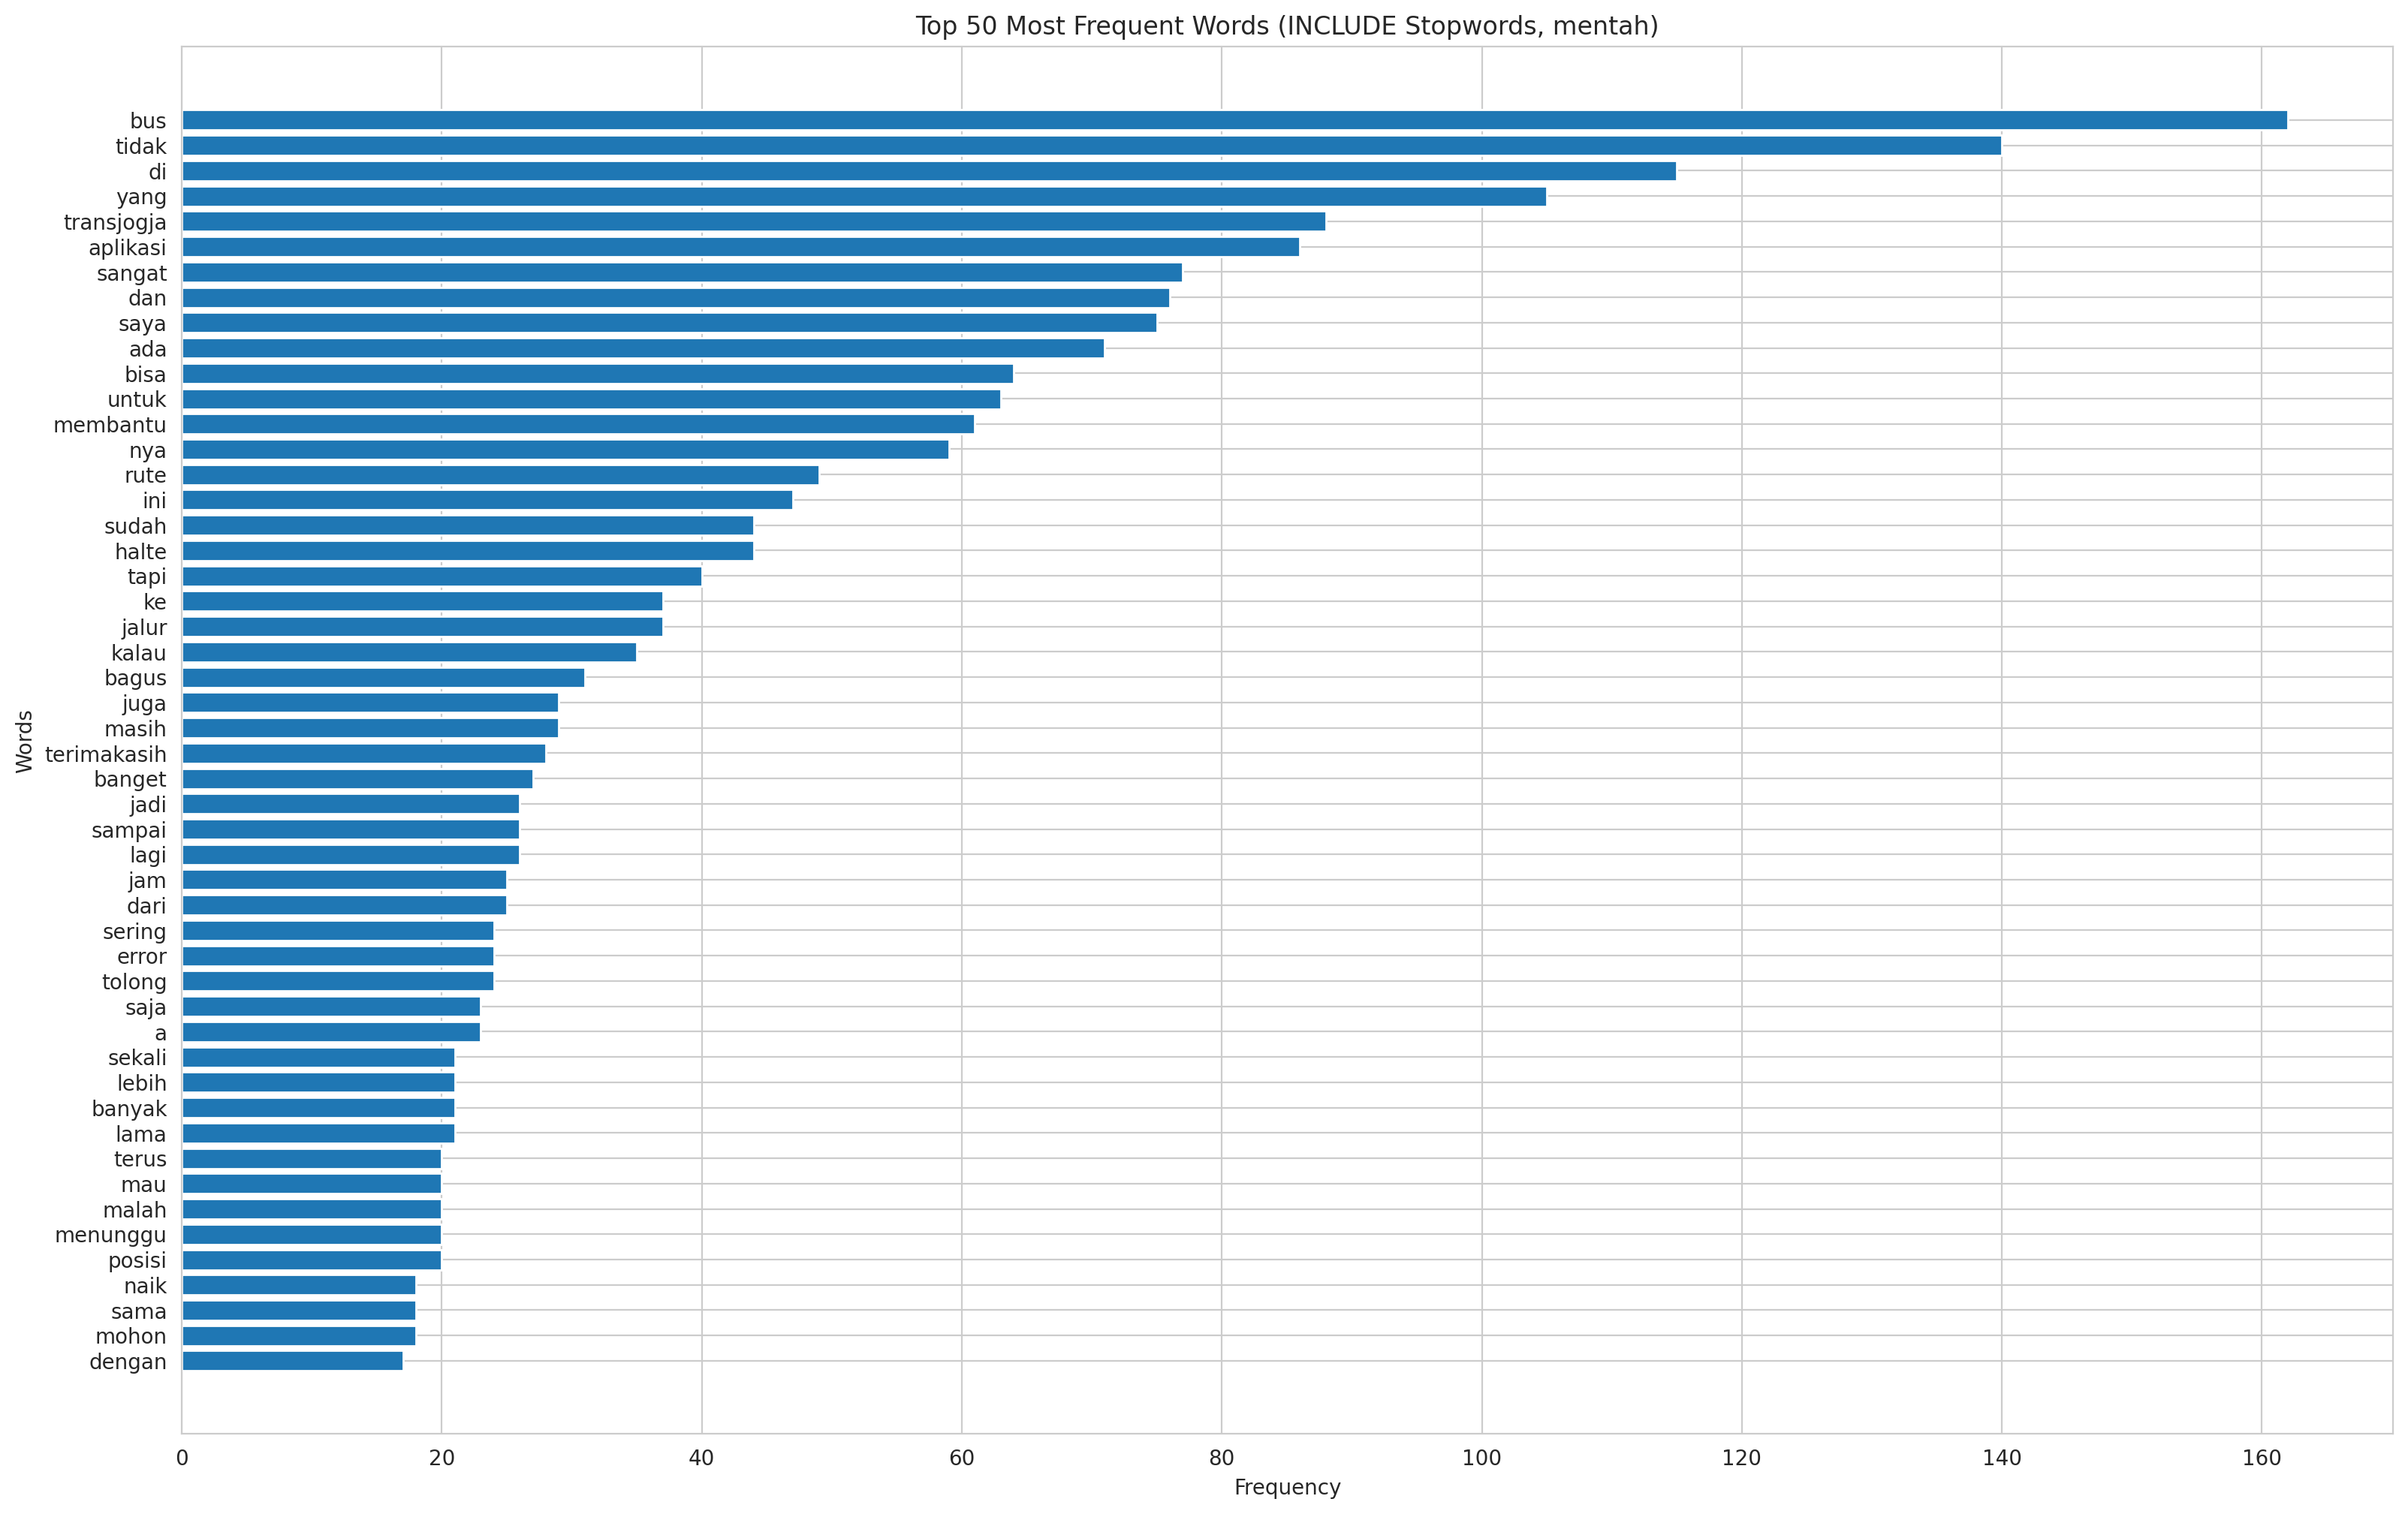

,Word,Frequency
0,l,1
1,instruksi,1
2,inovasi,1
3,kembangkan,1
4,semangat,1
5,kendala,1
6,wajar,1
7,work,1
8,dipahami,1
9,diterima,1


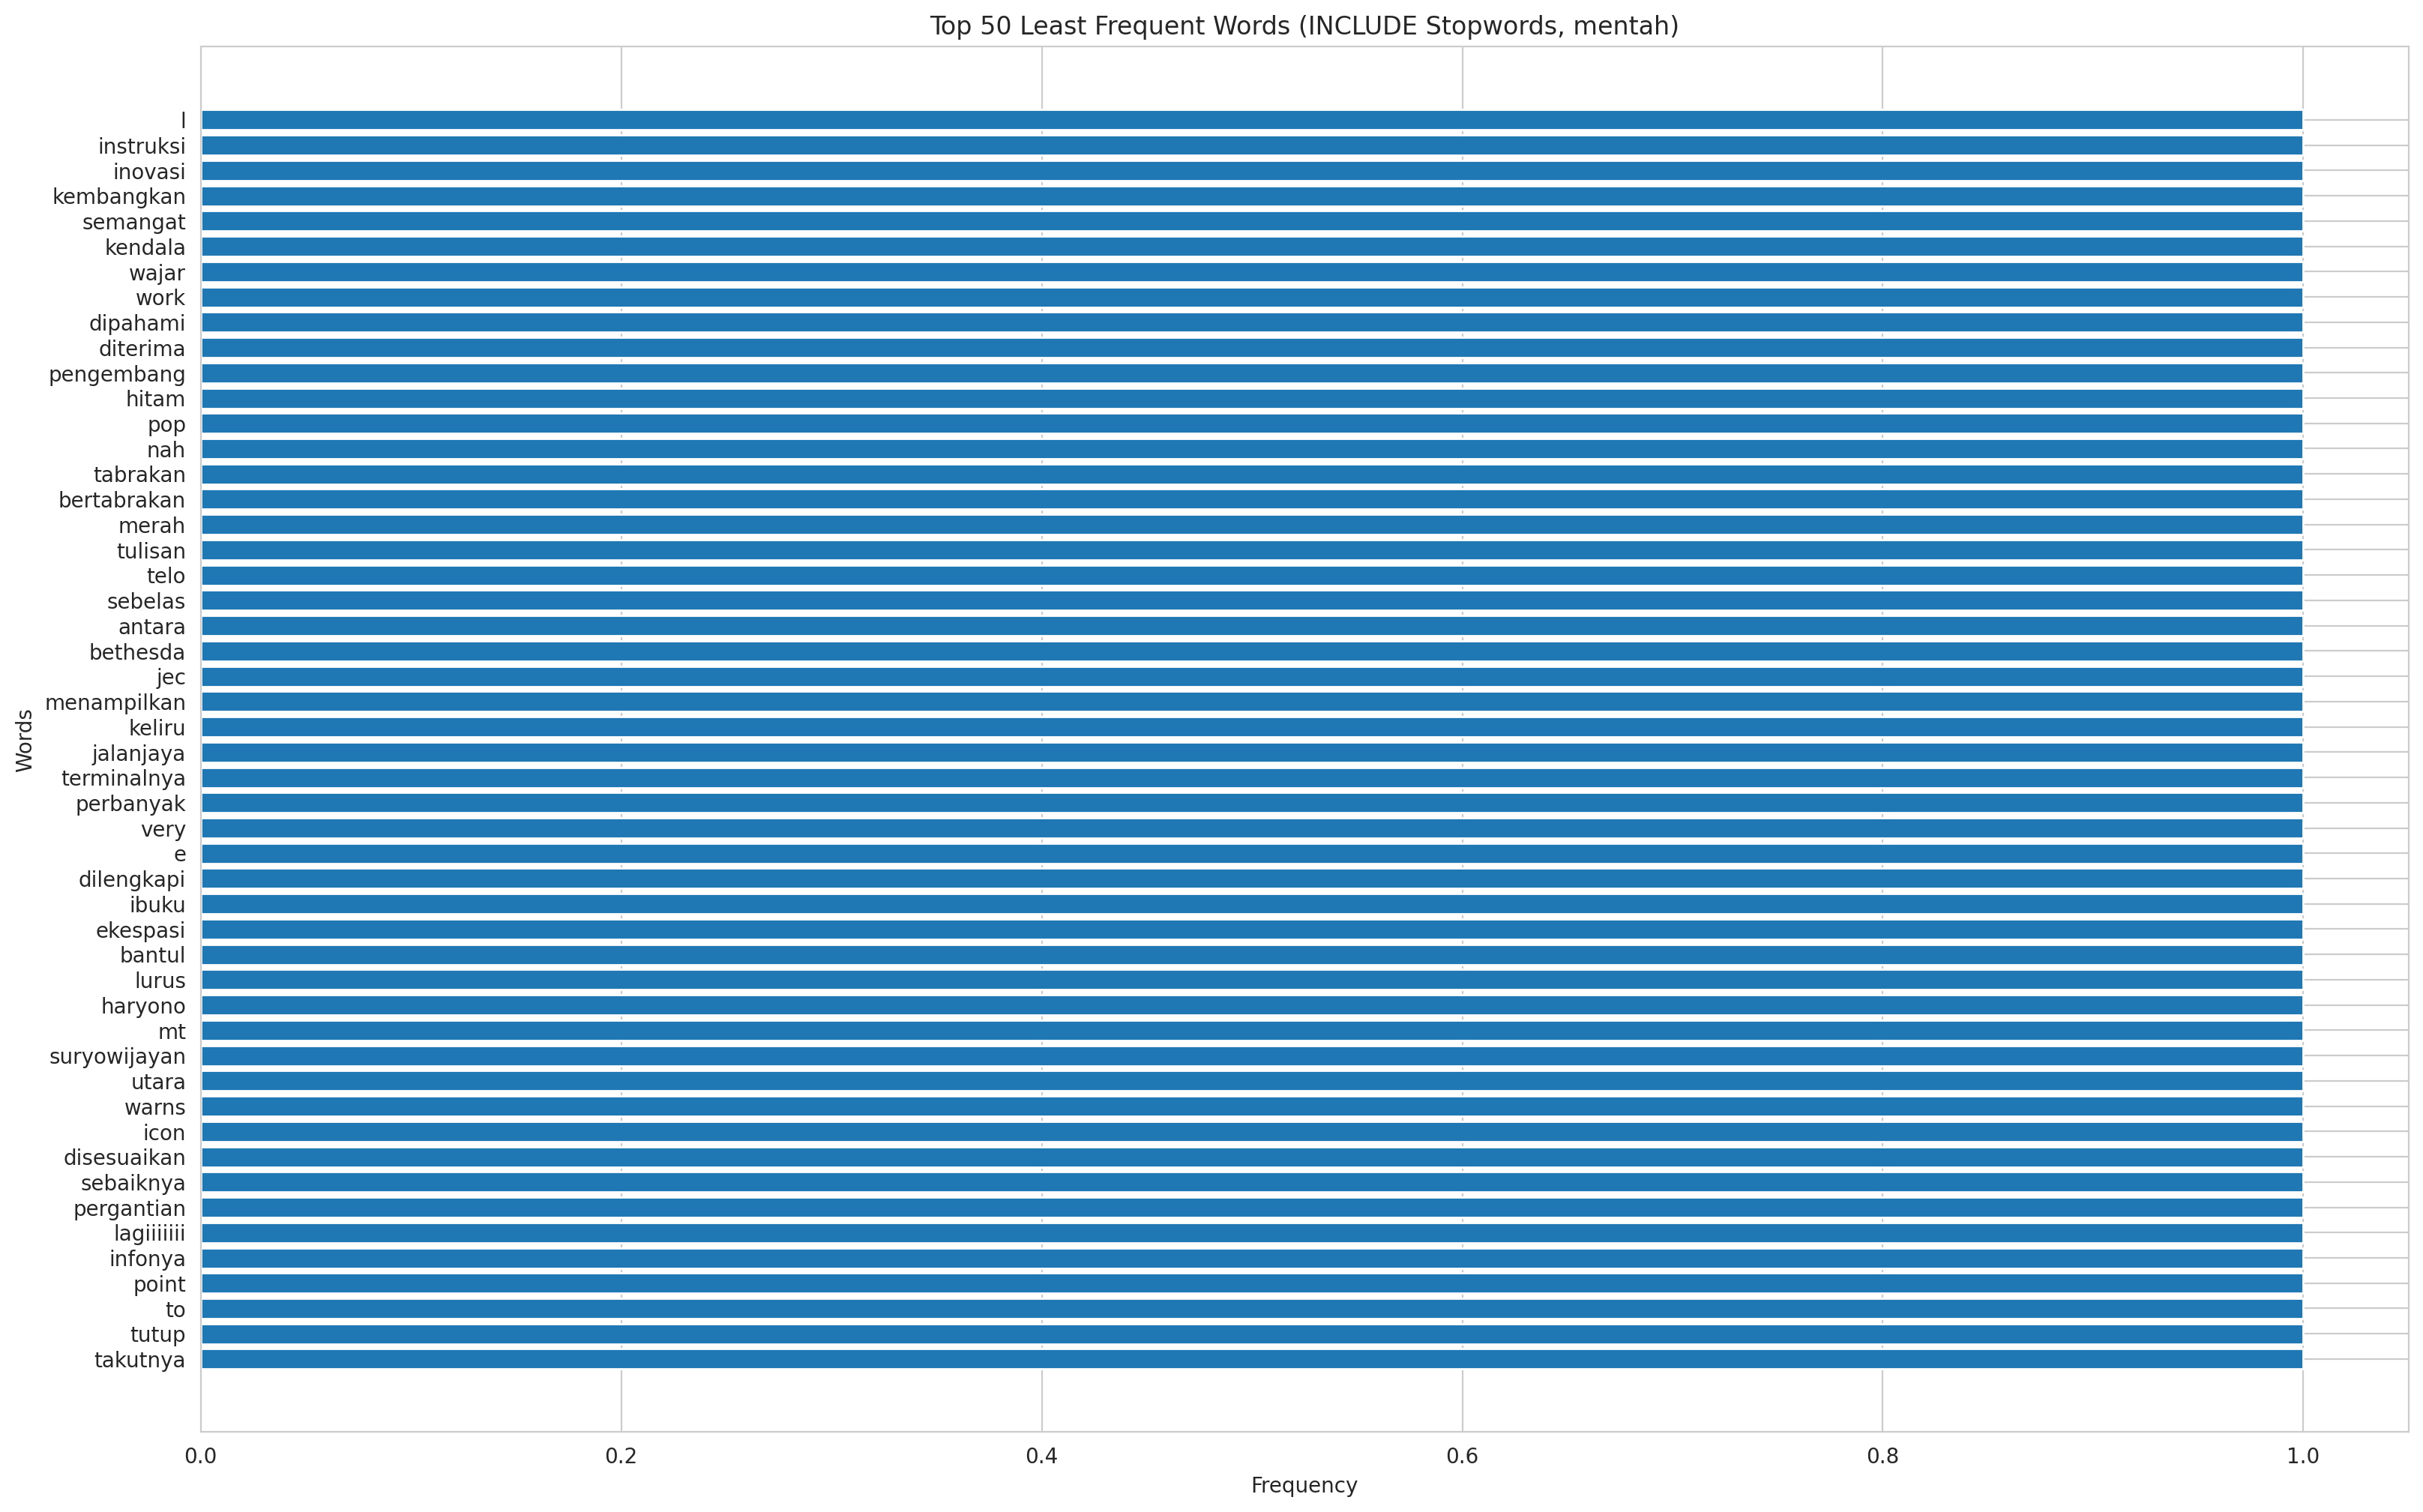

In [62]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


## TOKENIZATION & STOPWORD REMOVAL

### Download, new column

In [63]:
import nltk
from nltk.tokenize import word_tokenize

# pastikan resource punkt udah ada
nltk.download('punkt_tab')

# bikin kolom baru 'tokens' hasil tokenisasi
df_transjog['tokens'] = df_transjog['content_cleaned'].apply(word_tokenize)

# cek hasilnya
print(df_transjog[['content_cleaned', 'tokens']].head(10))

                                                                 content_cleaned  \
0                                                                sangat membantu   
1                                                                         mantap   
2                                                           membantu sekali baik   
3                                                                         ngeleg   
4                                                         sangat membantu sekali   
5                                                  tracking bus bermasalah terus   
6                           aplikasi ini sangat membantu pengguna kendaraan umum   
7          aplikasi sering trouble dan lag jadi gabisa lihat bus nya sampai mana   
8  bagus tapi kursng lengkap terutama info rute bisa diupdate berkala sepertinya   
9                       membantu saya mengecek bus apakah sudah lewat atau belum   

                                                                           

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Freq words

In [64]:
# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Import FreqDist from nltk.probability
    from nltk.probability import FreqDist
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # selecting top N most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20, 5))
    # Use the 'rainbow' colormap for the bar plot
    ax = sns.barplot(data=d, x="word", y="count")
    # , palette="rainbow"
    ax.set(ylabel='Count')

    # Tambahin title
    plt.title(f"Most Frequent Words (Before Stop Words Removal) - Top {terms}")

    plt.show()

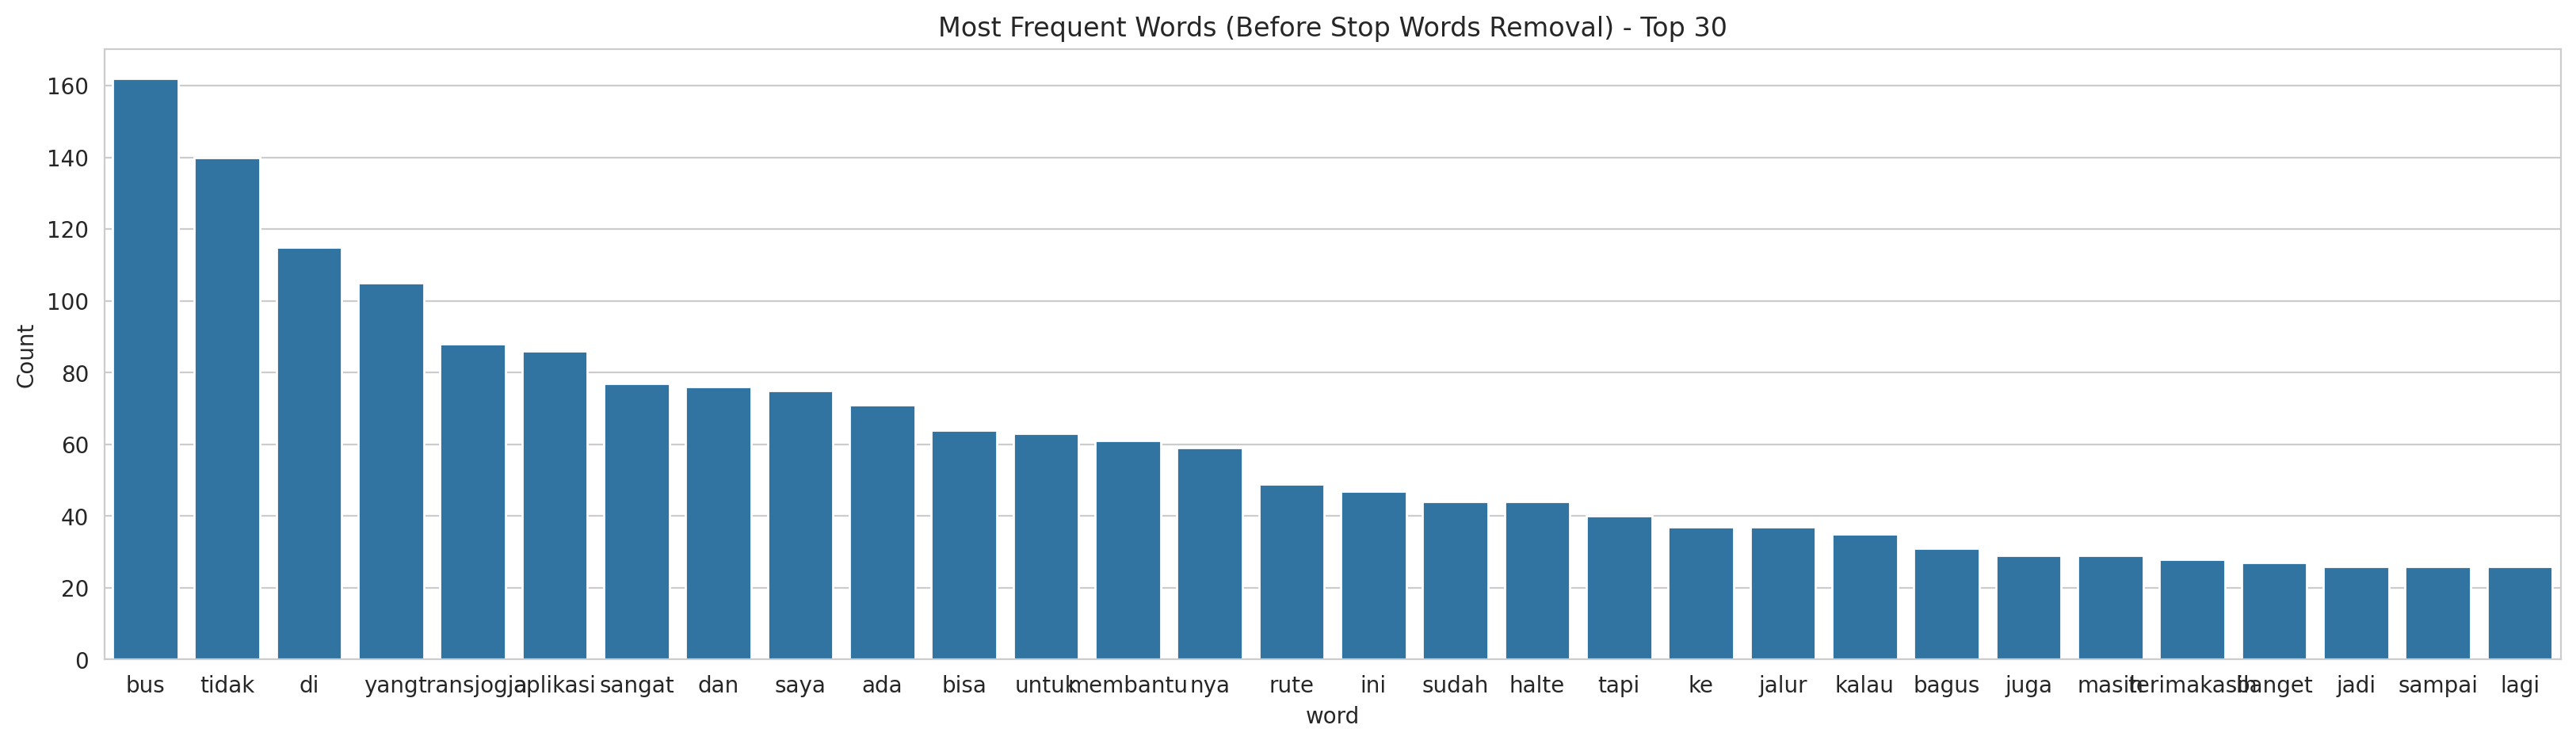

In [65]:
freq_words(df_transjog['content_cleaned'])

### Indonesian stopwords

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
print(len(indonesian_stopwords))

758


### Freq words excluding stopwords

,Word,Frequency
0,bus,162
1,transjogja,88
2,aplikasi,86
3,membantu,61
4,nya,59
5,rute,49
6,halte,44
7,jalur,37
8,bagus,31
9,terimakasih,28


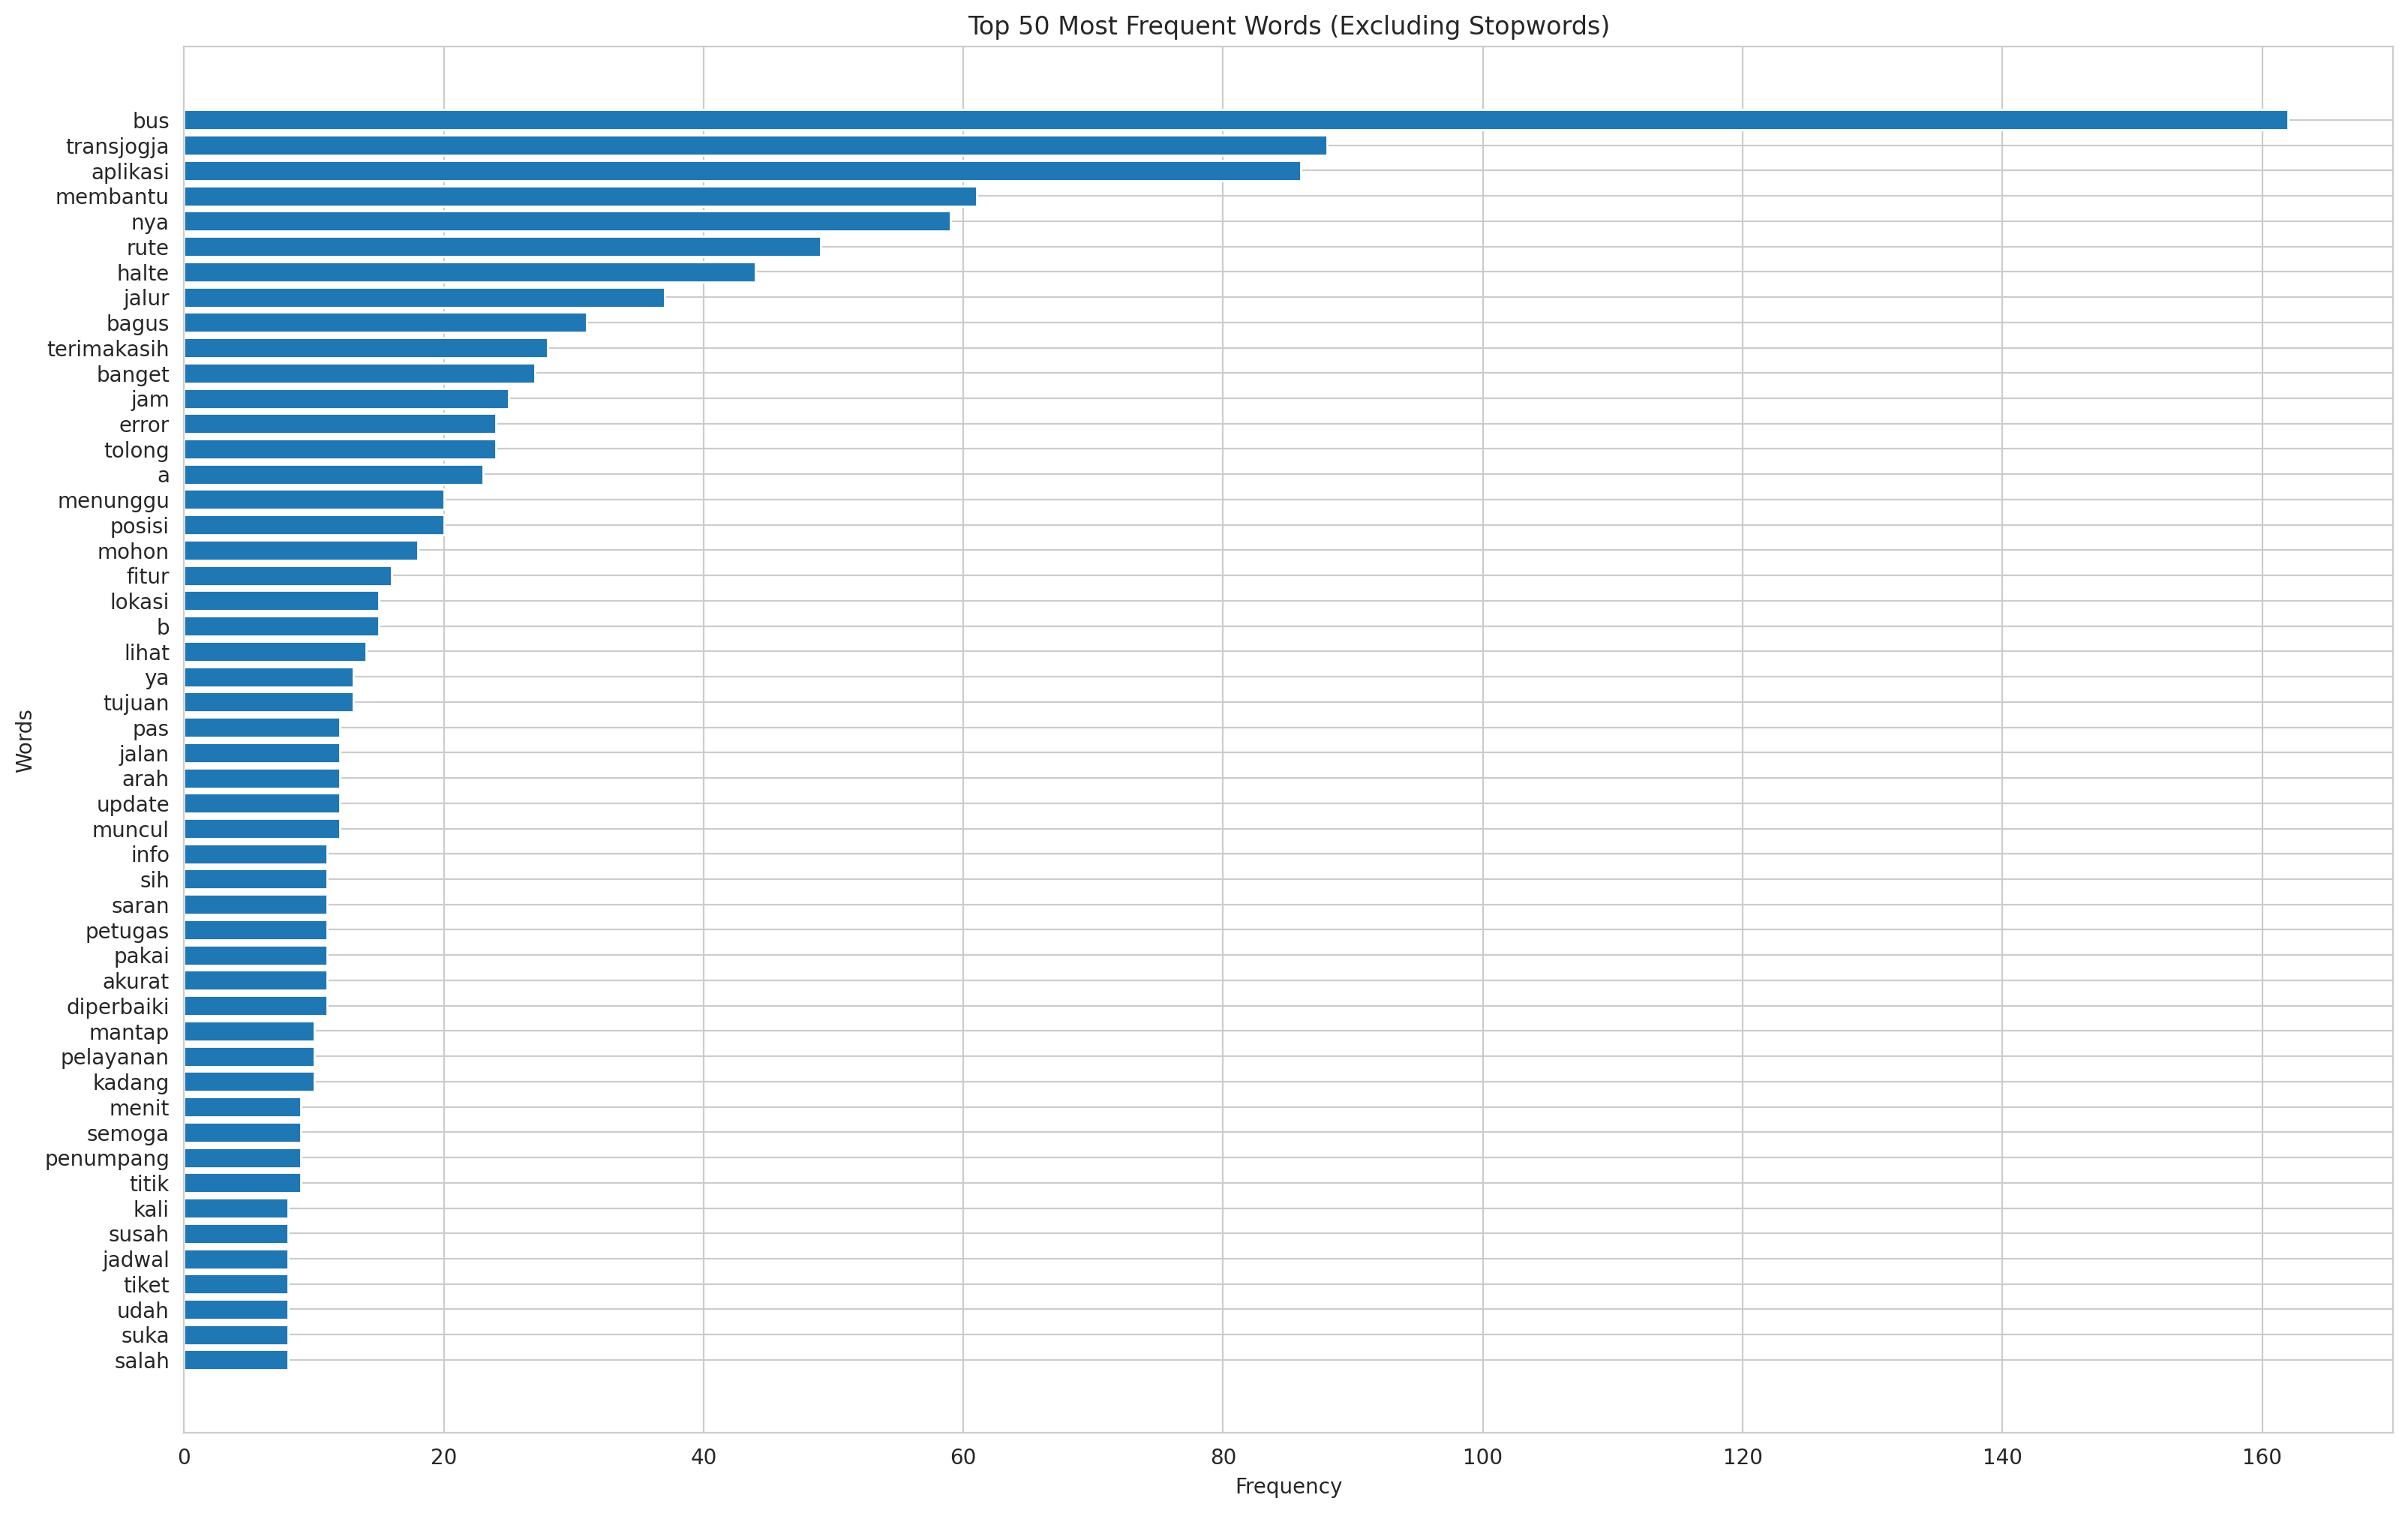

In [68]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Cek common words

In [69]:
common_words

[('bus', 162),
 ('transjogja', 88),
 ('aplikasi', 86),
 ('membantu', 61),
 ('nya', 59),
 ('rute', 49),
 ('halte', 44),
 ('jalur', 37),
 ('bagus', 31),
 ('terimakasih', 28),
 ('banget', 27),
 ('jam', 25),
 ('error', 24),
 ('tolong', 24),
 ('a', 23),
 ('menunggu', 20),
 ('posisi', 20),
 ('mohon', 18),
 ('fitur', 16),
 ('lokasi', 15),
 ('b', 15),
 ('lihat', 14),
 ('ya', 13),
 ('tujuan', 13),
 ('pas', 12),
 ('jalan', 12),
 ('arah', 12),
 ('update', 12),
 ('muncul', 12),
 ('info', 11),
 ('sih', 11),
 ('saran', 11),
 ('petugas', 11),
 ('pakai', 11),
 ('akurat', 11),
 ('diperbaiki', 11),
 ('mantap', 10),
 ('pelayanan', 10),
 ('kadang', 10),
 ('menit', 9),
 ('semoga', 9),
 ('penumpang', 9),
 ('titik', 9),
 ('kali', 8),
 ('susah', 8),
 ('jadwal', 8),
 ('tiket', 8),
 ('udah', 8),
 ('suka', 8),
 ('salah', 8)]

### Custom stopwords

In [70]:
# Pastikan indonesian_stopwords berbentuk set
indonesian_stopwords = set(indonesian_stopwords)

# Add custom stopwords dari hasil top 100 frequent words
custom_stopwords = {
    # filler umum
    "saya","ya","kok","mah","loh","lho","pls","please","ny","nya","deh","juga","yang", "sih"
    #"ga", "gak", "gk", "udah", "udh", "aja", "ya", "tp", "bgt", "ok", "gw", "sih",
    # kata ganti/partikel
    #"nya", "yg", "kalo", "d", "in",
    # tanda baca/angka
    #",", ".", "1", "2","&"
    # umum tidak bermakna kontekstual
    #"aja", "mulu", "udah", "udh", "sampe",
    # terkait servis
    #"transjogja","bus"
    #"bus","bis","aplikasi"
}


# Pastikan kata-kata penting tidak ikut jadi stopwords
for word in ["luar", "biasa", "baik","tepat"]:
    indonesian_stopwords.discard(word)

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)

print("Updated stopwords:", sorted(indonesian_stopwords))

Updated stopwords: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'be

### Freq words excluding custom stopwords

Words removed by custom stopwords:


,Word,Frequency
0,tidak,140
1,di,115
2,yang,105
3,sangat,77
4,dan,76
...,...,...
250,sini,1
251,sejauh,1
252,sebaiknya,1
253,antara,1


,Word,Frequency
0,bus,162
1,transjogja,88
2,aplikasi,86
3,membantu,61
4,rute,49
...,...,...
95,google,5
96,bingung,5
97,lancar,5
98,versi,5


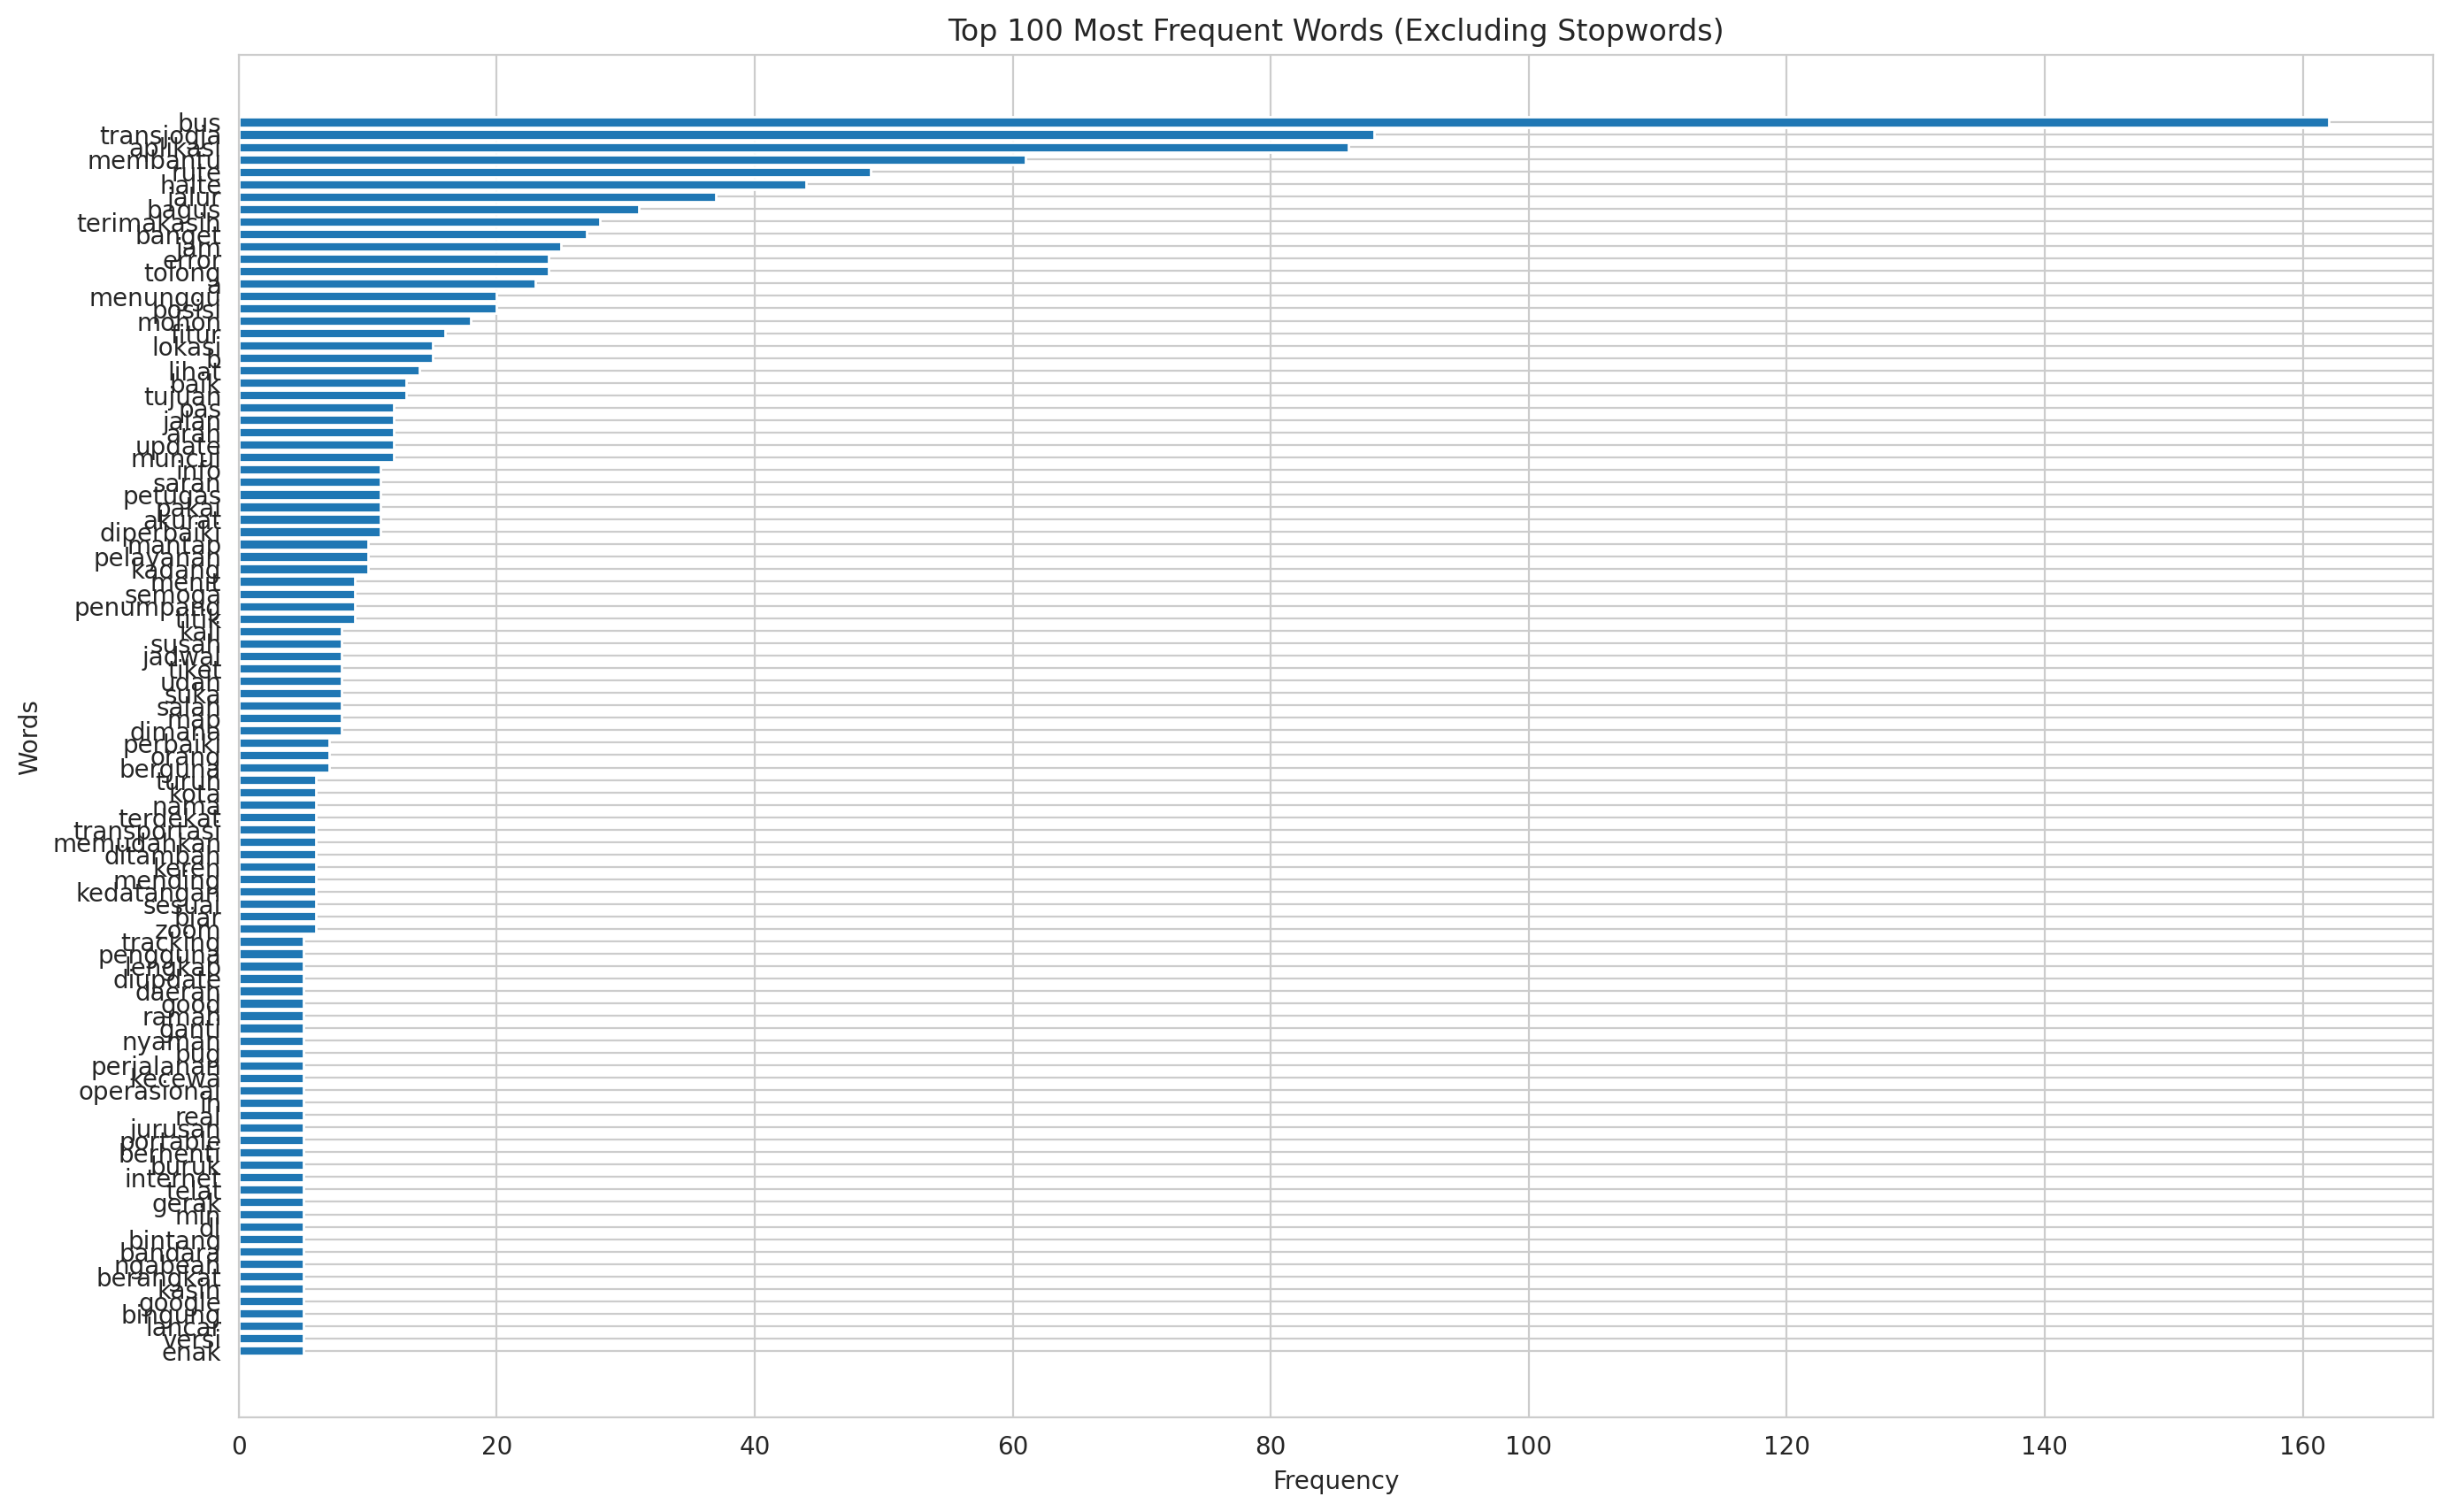

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content_cleaned'
text_column = 'content_cleaned'

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words
words = [word.lower() for word in all_text.split()]

# Cari kata yang kehapus karena stopwords
removed_words = [word for word in words if word in indonesian_stopwords]

# Hitung frekuensi kata yang kehapus
removed_counts = Counter(removed_words)
removed_df = pd.DataFrame(removed_counts.most_common(), columns=['Word', 'Frequency'])

print("Words removed by custom stopwords:")
display(removed_df)

# Filter stopwords
filtered_words = [word for word in words if word not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
#colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    #color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Remove all stopwords

In [72]:
# fungsi untuk hapus stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        return ' '.join([w for w in words if w not in indonesian_stopwords])
    return text

# bikin kolom baru di dataframe
df_transjog['content_cleaned_stopwords'] = df_transjog['content_cleaned'].apply(remove_stopwords)

# cek hasil
print(df_transjog[['content','content_cleaned', 'content_cleaned_stopwords']].head(10))

                                                                         content  \
0                                                                sangat membantu   
1                                                                          mntap   
2                                                           membantu sekali baik   
3                                                                         ngeleg   
4                                                        sangat membantu sekali    
5                                             tracking busnya bermasalah terus..   
6                           aplikasi ini sangat membantu pengguna kendaraan umum   
7        aplikasinya sering trouble dan lag jadi gabisa liat bis nya sampai mana   
8  bagus, tp kursng lengkap terutama info rute, bisa diupdate berkala sepertinya   
9                        membantu aku mengecek bis apakah sudah lewat atau belum   

                                                                 content_cl

In [73]:

df_transjog['clean_tokens'] = df_transjog['tokens'].apply(
    lambda toks: [w for w in toks if w not in indonesian_stopwords]
)

In [74]:
# Liat 5 baris pertama
print(df_transjog[['content','content_cleaned','content_cleaned_stopwords', 'tokens', 'clean_tokens']].head())

# Liat baris tertentu (misal index ke-100)
print(df_transjog[['content','content_cleaned', 'content_cleaned_stopwords','tokens', 'clean_tokens']].iloc[100])

# Kalau mau tampil rapi (pake Pandas display)
import pandas as pd
pd.set_option('max_colwidth', 200)  # biar teksnya ga dipotong
display(df_transjog[['content','content_cleaned','content_cleaned_stopwords', 'tokens', 'clean_tokens']].sample(5))

                   content         content_cleaned content_cleaned_stopwords  \
0          sangat membantu         sangat membantu                  membantu   
1                    mntap                  mantap                    mantap   
2     membantu sekali baik    membantu sekali baik             membantu baik   
3                   ngeleg                  ngeleg                    ngeleg   
4  sangat membantu sekali   sangat membantu sekali                  membantu   

                       tokens      clean_tokens  
0          [sangat, membantu]        [membantu]  
1                    [mantap]          [mantap]  
2    [membantu, sekali, baik]  [membantu, baik]  
3                    [ngeleg]          [ngeleg]  
4  [sangat, membantu, sekali]        [membantu]  
content                          update bikin ngelag
content_cleaned                  update bikin ngelag
content_cleaned_stopwords        update bikin ngelag
tokens                       [update, bikin, ngelag]
clean_t

,content,content_cleaned,content_cleaned_stopwords,tokens,clean_tokens
38,mantap,mantap,mantap,[mantap],[mantap]
188,aplikasinya kelihatan memudahkan tapi klo lokasi dibalik dari lokasi ke tempat tujuan gak muncul sama sekali malah menyulitkan,aplikasi kelihatan memudahkan tapi kalau lokasi dibalik dari lokasi ke tempat tujuan tidak muncul sama sekali malah menyulitkan,aplikasi memudahkan lokasi dibalik lokasi tujuan muncul menyulitkan,"[aplikasi, kelihatan, memudahkan, tapi, kalau, lokasi, dibalik, dari, lokasi, ke, tempat, tujuan, tidak, muncul, sama, sekali, malah, menyulitkan]","[aplikasi, memudahkan, lokasi, dibalik, lokasi, tujuan, muncul, menyulitkan]"
257,aplikasi nya eror truss,aplikasi nya error terus,aplikasi error,"[aplikasi, nya, error, terus]","[aplikasi, error]"
336,4 bintang dulu yaa... karena masih ada beberapa bis yg salah jalur. disempurnakan ya min.l,bintang dulu ya karena masih ada beberapa bus yang salah jalur disempurnakan ya min l,bintang bus salah jalur disempurnakan min l,"[bintang, dulu, ya, karena, masih, ada, beberapa, bus, yang, salah, jalur, disempurnakan, ya, min, l]","[bintang, bus, salah, jalur, disempurnakan, min, l]"
135,akurat,akurat,akurat,[akurat],[akurat]


### Cek freq and least

,Word,Frequency
0,bus,162
1,transjogja,88
2,aplikasi,86
3,membantu,61
4,rute,49
5,halte,44
6,jalur,37
7,bagus,31
8,terimakasih,28
9,banget,27


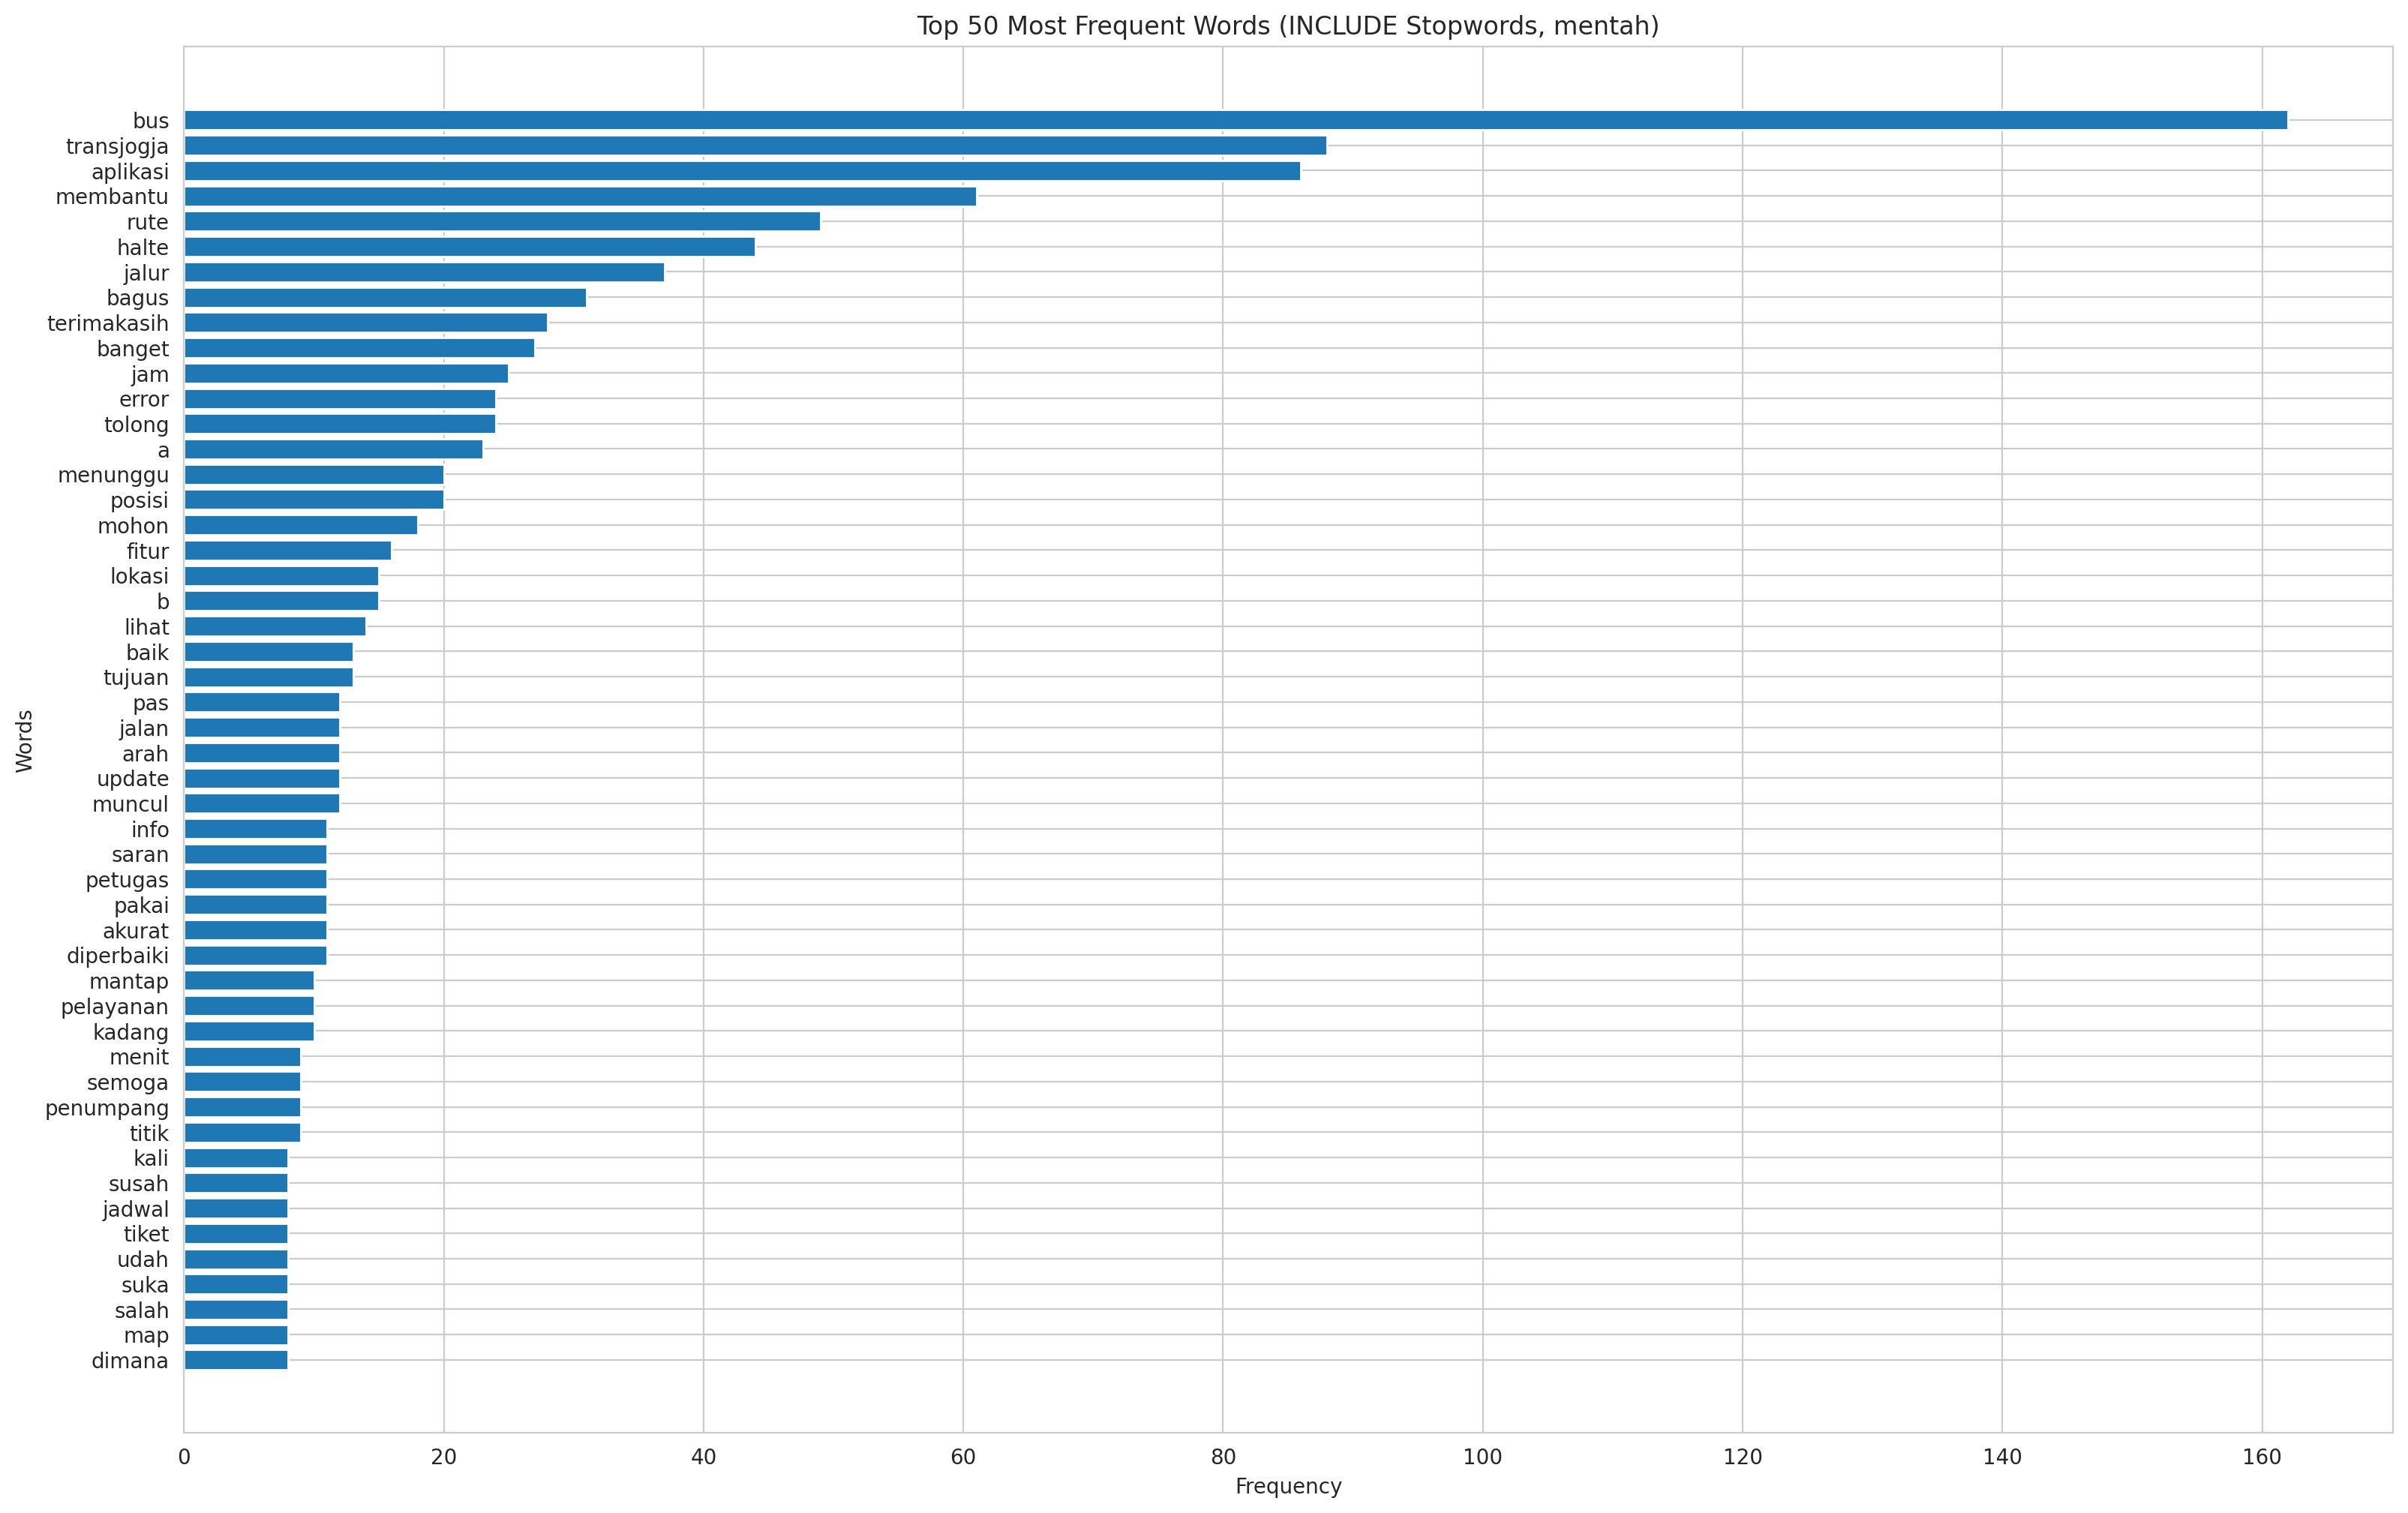

,Word,Frequency
0,l,1
1,instruksi,1
2,inovasi,1
3,kembangkan,1
4,semangat,1
5,kendala,1
6,wajar,1
7,work,1
8,dipahami,1
9,diterima,1


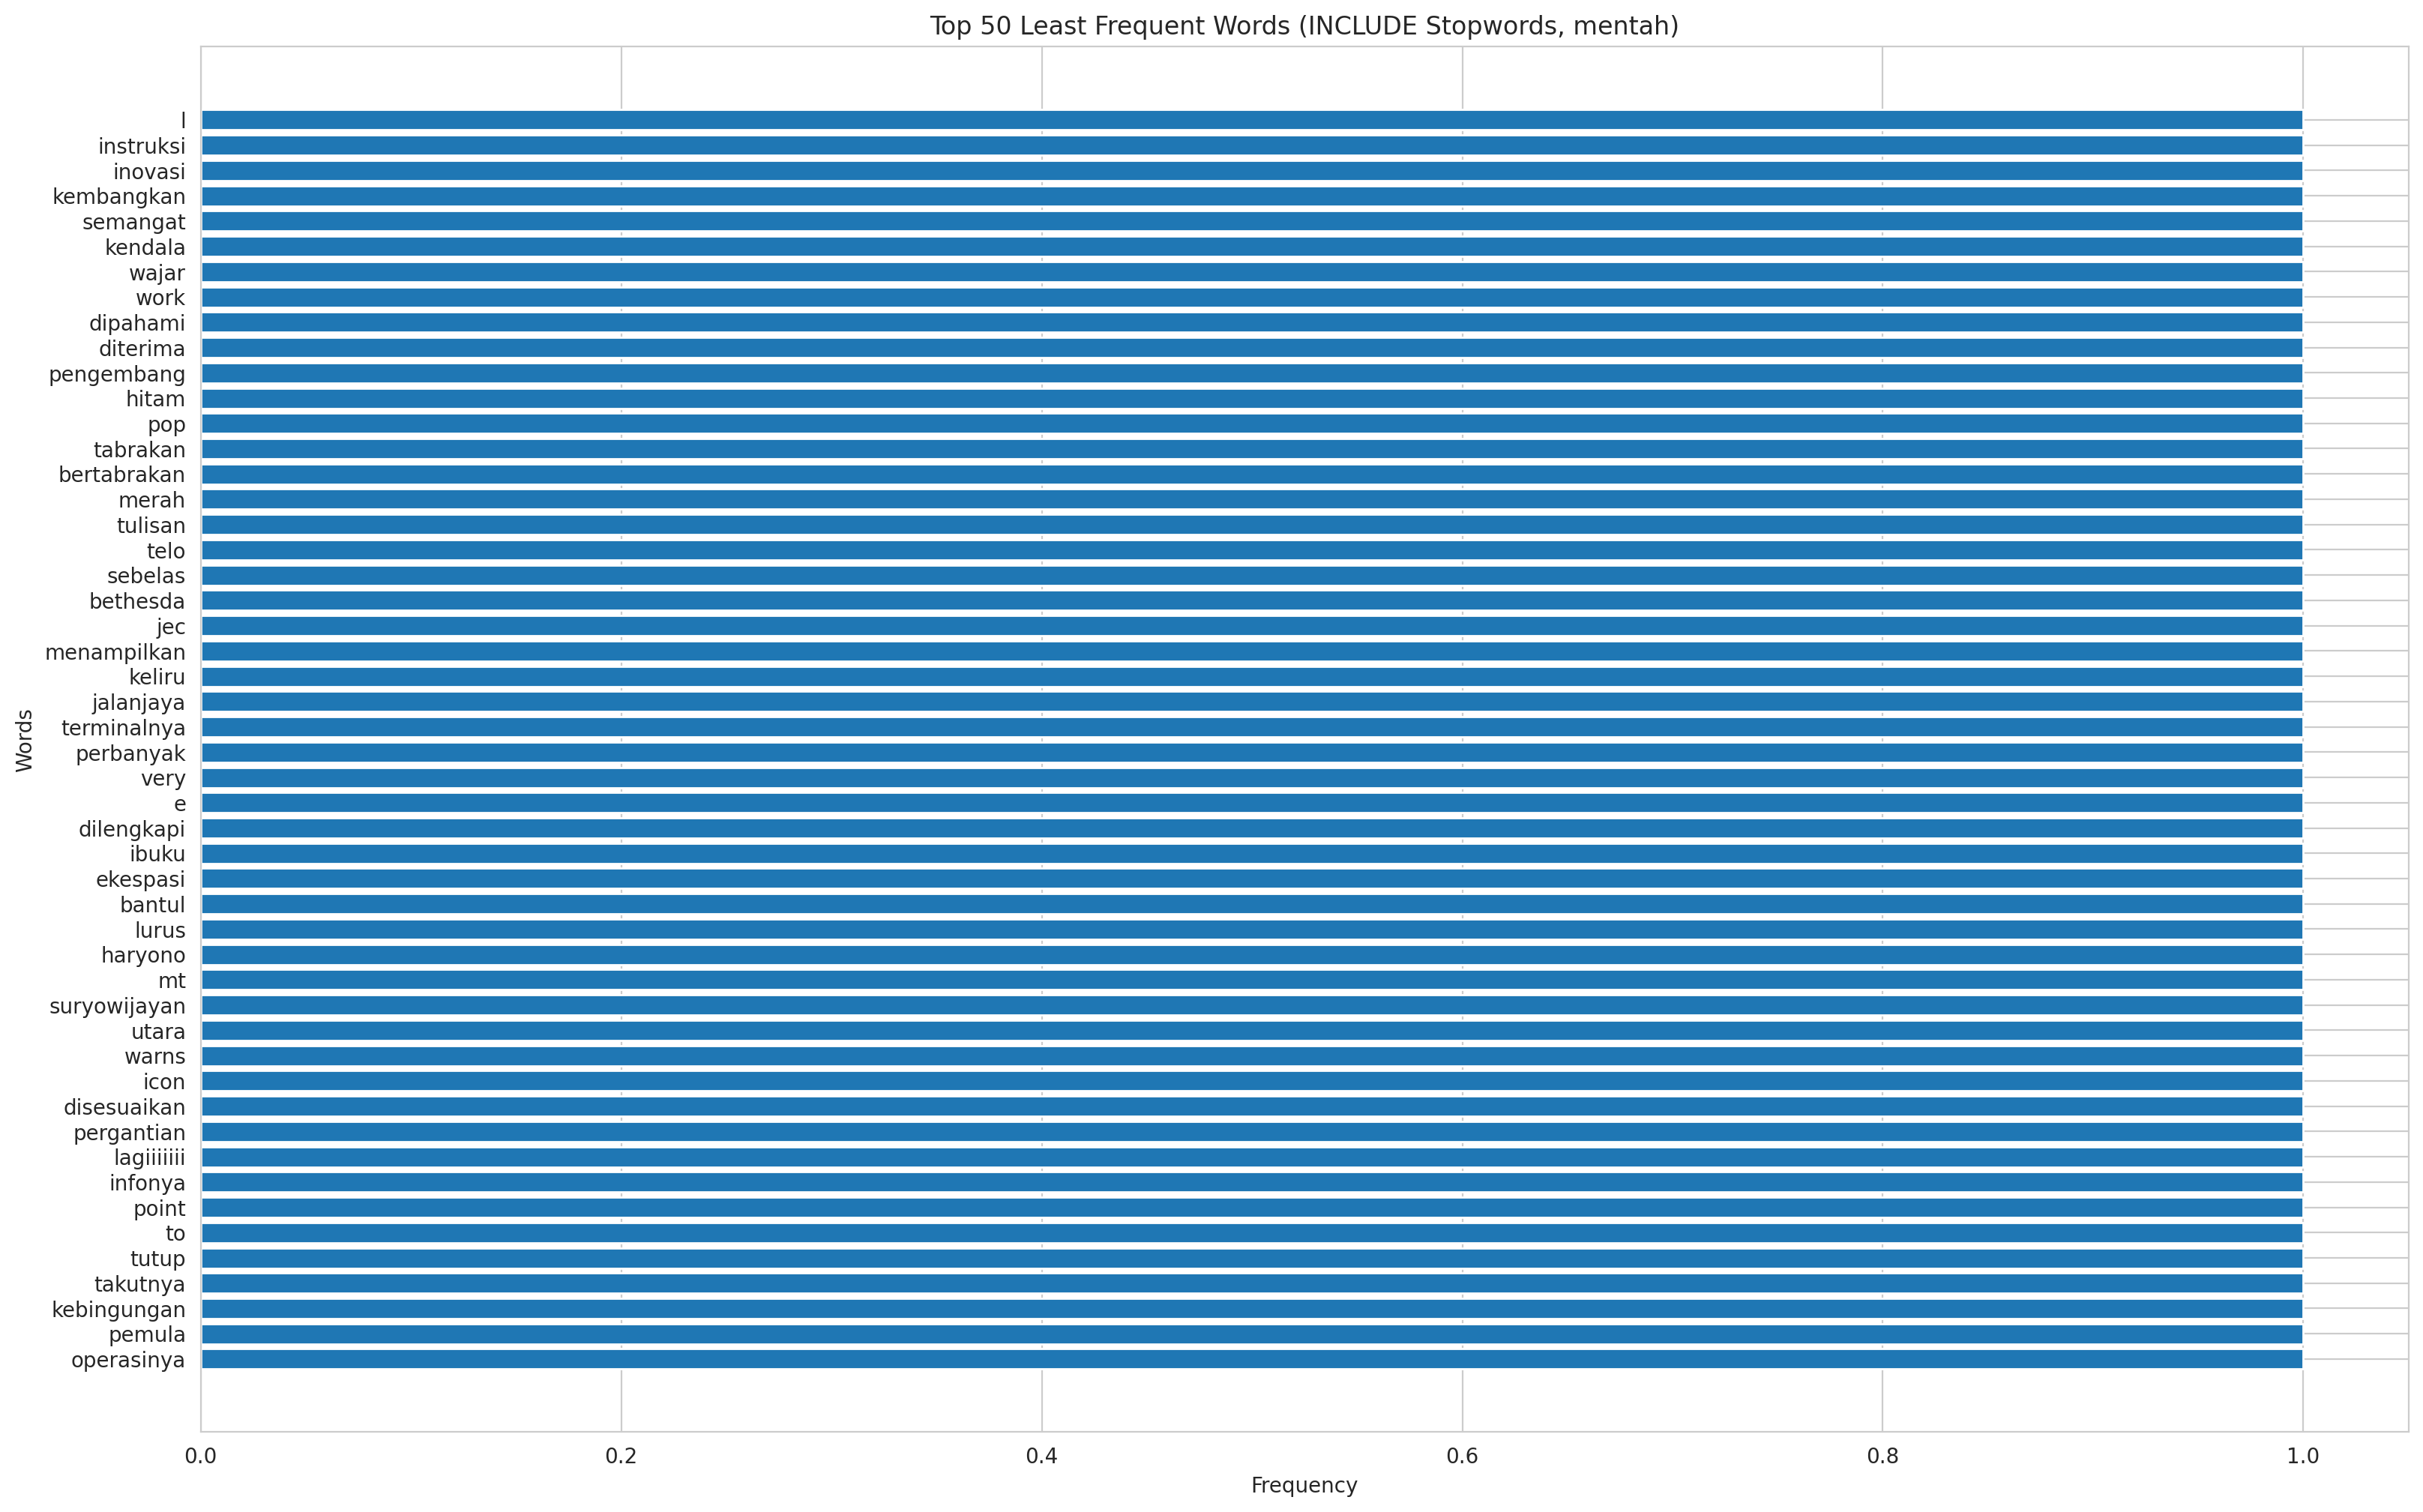

In [75]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned_stopwords'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


### Remove least

#### Cek lagi dulu

,Word,Frequency
0,bermasalah,2
1,trouble,2
2,transit,2
3,mobilitas,2
4,email,2
...,...,...
831,semangat,1
832,kembangkan,1
833,inovasi,1
834,instruksi,1


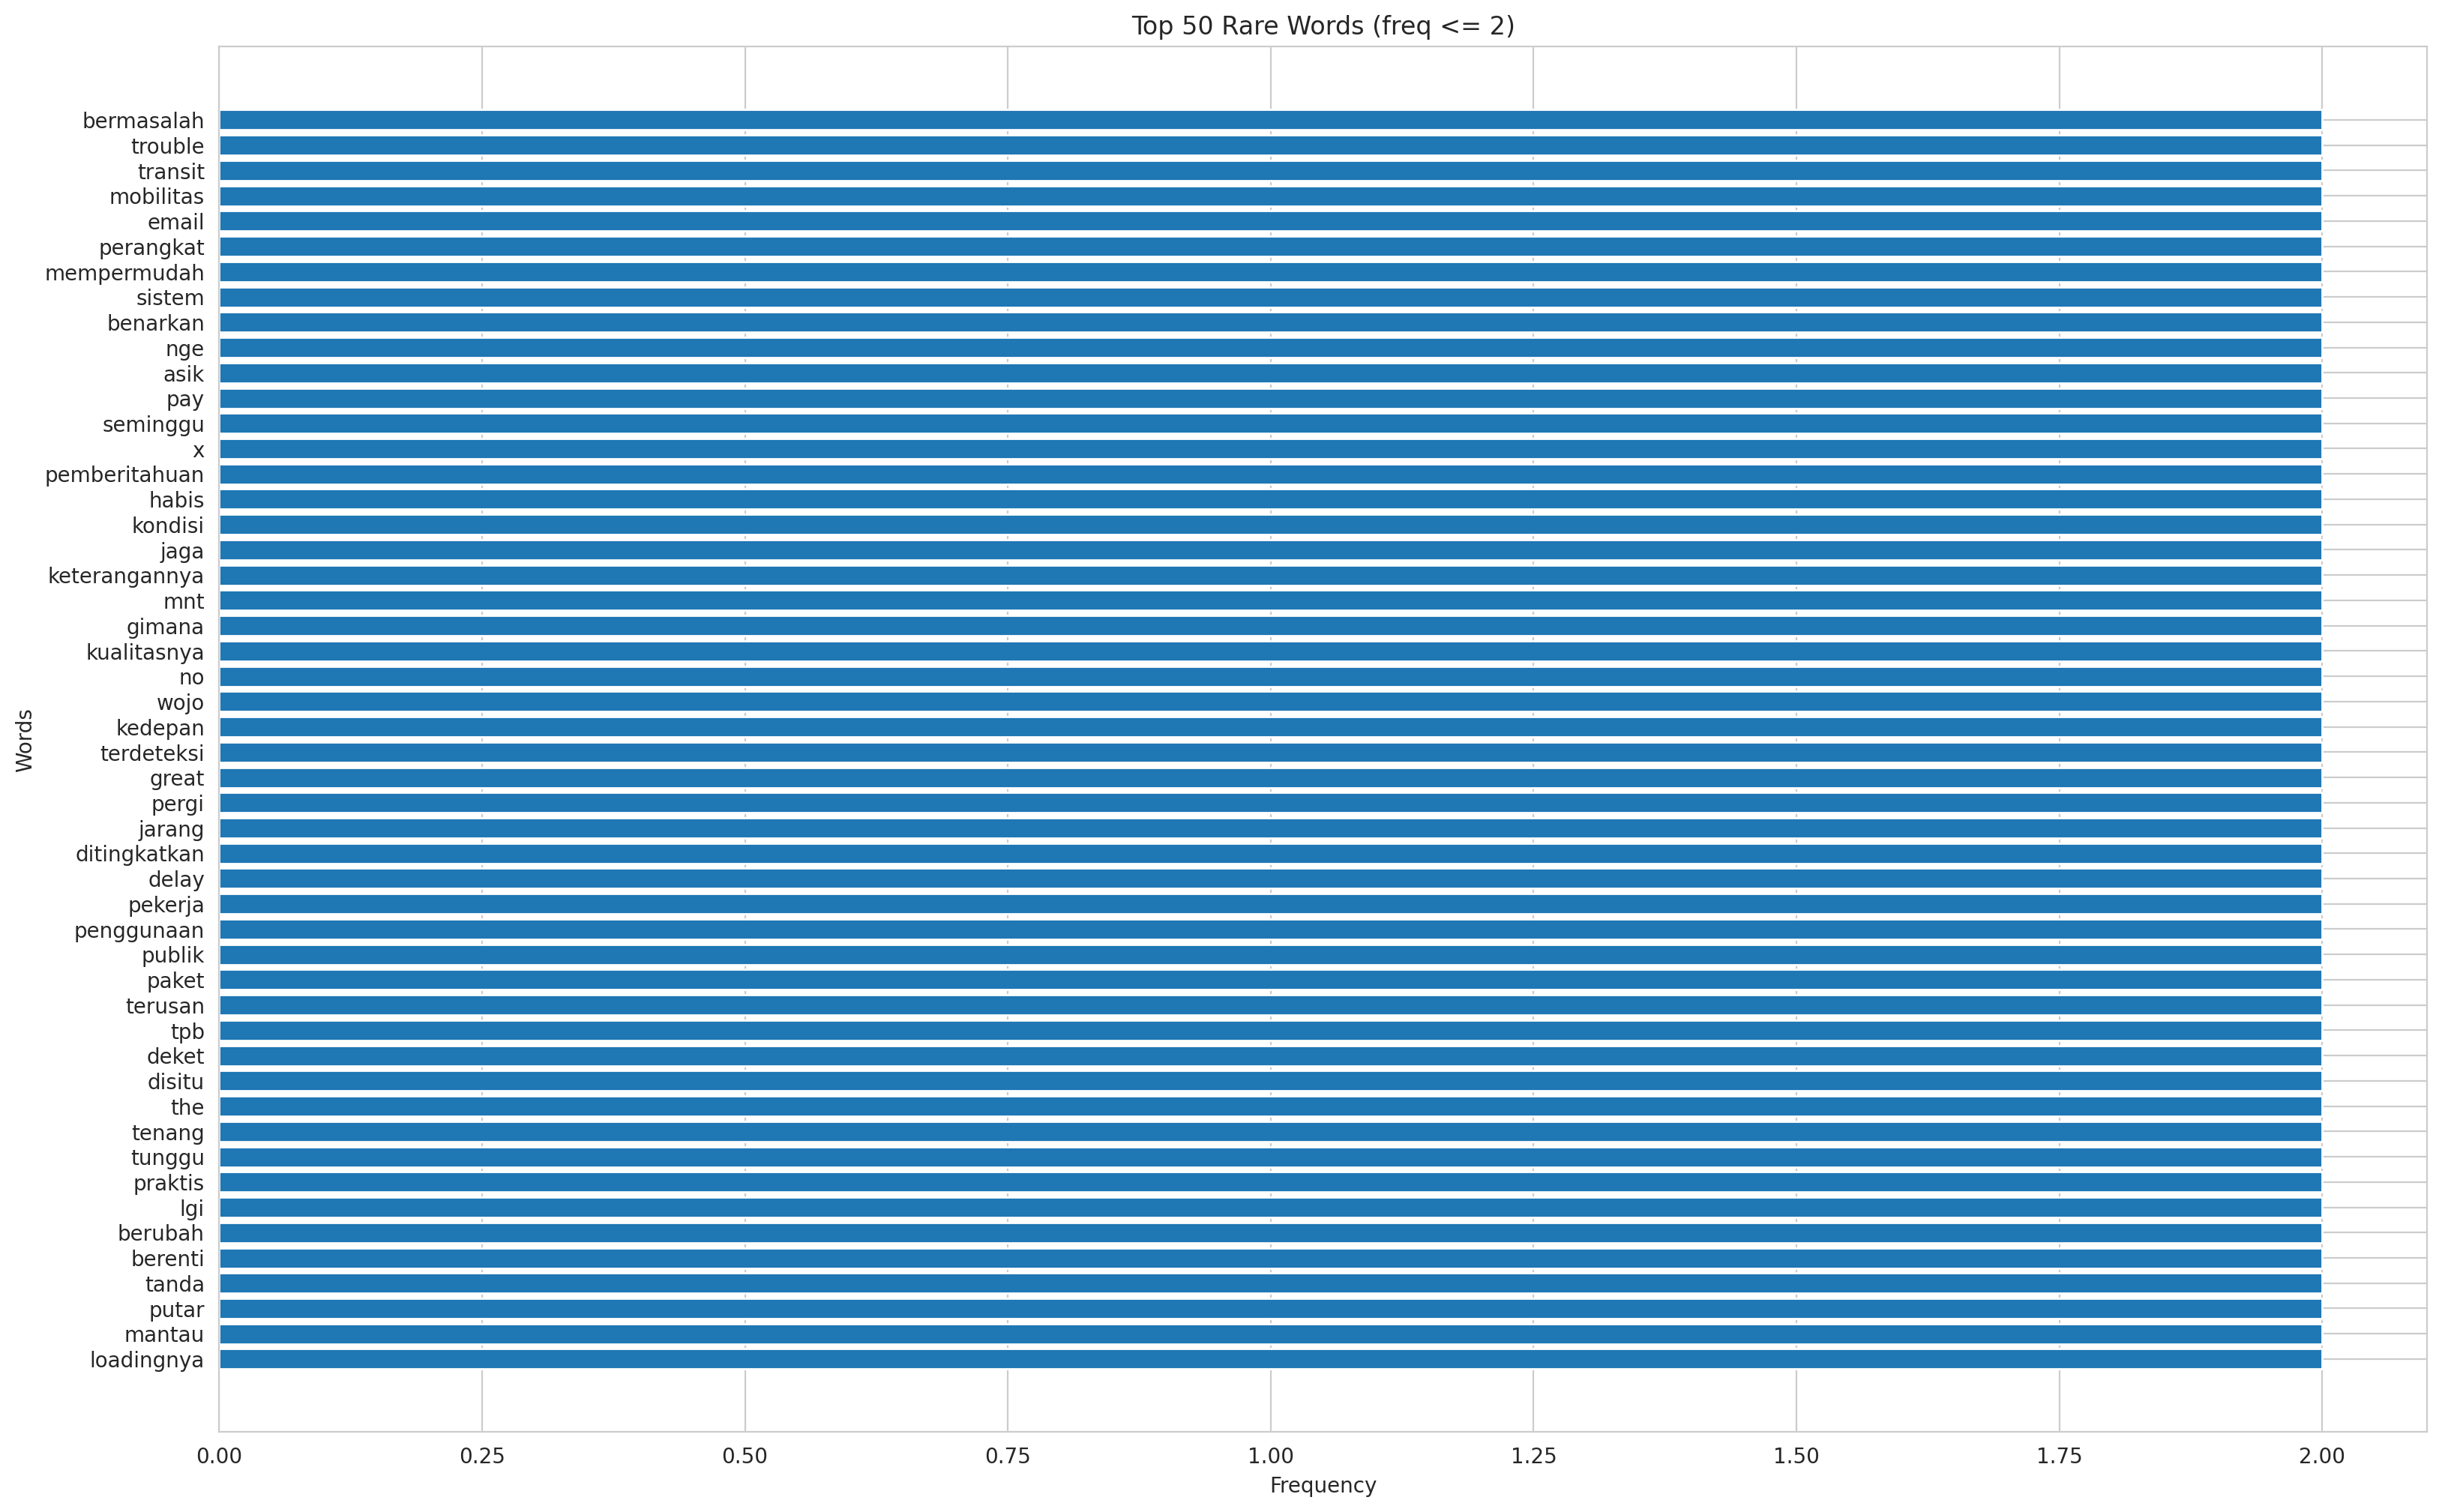

total tokens: 2706
rare tokens (freq <=2): 967
persentase rare tokens: 35.74%


In [76]:
# ambil kata yg freq <= 2
rare_counts = {word: count for word, count in word_counts.items() if count <= 2}

# ubah ke Counter biar gampang
rare_word_counts = Counter(rare_counts)

# convert ke DataFrame
rare_word_freq_df = pd.DataFrame(rare_word_counts.most_common(), columns=['Word', 'Frequency'])
display(rare_word_freq_df)

# plot (optional, top 50 rare)
plt.figure(figsize=(19, 12))
plt.barh(rare_word_freq_df['Word'][:50][::-1], rare_word_freq_df['Frequency'][:50][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Rare Words (freq <= 2)")
plt.show()

# total semua token
total_tokens = sum(word_counts.values())

# total token yg freq <= 2
rare_tokens = sum(count for word, count in word_counts.items() if count <= 2)

# persentase
rare_percentage = (rare_tokens / total_tokens) * 100

print(f"total tokens: {total_tokens}")
print(f"rare tokens (freq <=2): {rare_tokens}")
print(f"persentase rare tokens: {rare_percentage:.2f}%")



#### Ngapus

In [77]:
# kumpulin kata yang freq <= 2
rare_words = {word for word, count in word_counts.items() if count <= 2}

# bikin kolom baru yg udah bersih dari rare words
df_transjog['content_cleaned_stopwords_filtered'] = df_transjog[text_column].apply(
    lambda x: ' '.join([w for w in str(x).split() if w not in rare_words])
)

# cek hasilnya
print(df_transjog[['content_cleaned_stopwords', 'content_cleaned_stopwords_filtered']].head())

  content_cleaned_stopwords content_cleaned_stopwords_filtered
0                  membantu                           membantu
1                    mantap                             mantap
2             membantu baik                      membantu baik
3                    ngeleg                                   
4                  membantu                           membantu


## STEMMING/LEMMATIZATION

### Install Sastrawi

In [78]:

!pip install sastrawi

### Inisialisasi, apply, cek

In [79]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming ke clean_tokens
df_transjog['stemmed_tokens'] = df_transjog['clean_tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

# Kalau mau bikin string lagi (buat TF-IDF atau ML klasik)
df_transjog['final_text'] = df_transjog['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cek hasil
print(df_transjog[['content_cleaned', 'clean_tokens', 'stemmed_tokens', 'final_text']].head())

          content_cleaned      clean_tokens stemmed_tokens  final_text
0         sangat membantu        [membantu]        [bantu]       bantu
1                  mantap          [mantap]       [mantap]      mantap
2    membantu sekali baik  [membantu, baik]  [bantu, baik]  bantu baik
3                  ngeleg          [ngeleg]       [ngeleg]      ngeleg
4  sangat membantu sekali        [membantu]        [bantu]       bantu


### Cek kolom, gabung

In [80]:
# Kolom penting dari review
important_cols = ["content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt","content_cleaned", "content_cleaned_stopwords"]

# Kolom hasil preprocessing
preproc_cols = ["tokens", "clean_tokens", "stemmed_tokens", "final_text"]

# Gabung jadi satu
df_preview = df_transjog.loc[:, important_cols + preproc_cols]

# Biar teks ga kepotong
import pandas as pd
pd.set_option('max_colwidth', 150)

# Tampilkan sample 5 row
display(df_preview.sample(5))

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,content_cleaned,content_cleaned_stopwords,tokens,clean_tokens,stemmed_tokens,final_text
14,"sangat membantu mobilitas. murah, nyaman",5,0,2.3.5,2025-09-02 03:55:16,None,NaT,sangat membantu mobilitas murah nyaman,membantu mobilitas murah nyaman,"[sangat, membantu, mobilitas, murah, nyaman]","[membantu, mobilitas, murah, nyaman]","[bantu, mobilitas, murah, nyaman]",bantu mobilitas murah nyaman
92,"mohon untuk halte halte yang baru di rute jalur 14 dan 12 diberi tanda, dikarenakan ada beberapa bus yang tidak berhenti di situ saat penumpang me...",5,8,2.3.0,2025-02-14 23:33:18,None,NaT,mohon untuk halte halte yang baru di rute jalur dan diberi tanda dikarenakan ada beberapa bus yang tidak berhenti di situ saat penumpang menunggu ...,mohon halte halte rute jalur tanda bus berhenti situ penumpang menunggu mohon sop halte bus berhenti penumpang disabilitas netra bus mohon rute a ...,"[mohon, untuk, halte, halte, yang, baru, di, rute, jalur, dan, diberi, tanda, dikarenakan, ada, beberapa, bus, yang, tidak, berhenti, di, situ, sa...","[mohon, halte, halte, rute, jalur, tanda, bus, berhenti, situ, penumpang, menunggu, mohon, sop, halte, bus, berhenti, penumpang, disabilitas, netr...","[mohon, halte, halte, rute, jalur, tanda, bus, henti, situ, tumpang, tunggu, mohon, sop, halte, bus, henti, tumpang, disabilitas, netra, bus, moho...",mohon halte halte rute jalur tanda bus henti situ tumpang tunggu mohon sop halte bus henti tumpang disabilitas netra bus mohon rute a b edit a b p...
303,rute bus dari pakem belum ada kah?,4,6,1.0.7,2021-10-07 16:41:37,None,NaT,rute bus dari pakem belum ada kah,rute bus pakem kah,"[rute, bus, dari, pakem, belum, ada, kah]","[rute, bus, pakem, kah]","[rute, bus, pakem, kah]",rute bus pakem kah
179,aplikasi bus trans jogja sangat bagus dan bermanfaat sekali bagi masyarakat dan para pengguna bus trans jogja untuk perjalanan dalam kota jogja ya...,5,0,2.1.4,2023-09-10 11:00:00,None,NaT,aplikasi bus transjogja transjogja sangat bagus dan bermanfaat sekali bagi masyarakat dan para pengguna bus transjogja transjogja untuk perjalanan...,aplikasi bus transjogja transjogja bagus bermanfaat masyarakat pengguna bus transjogja transjogja perjalanan kota transjogja murah nyaman,"[aplikasi, bus, transjogja, transjogja, sangat, bagus, dan, bermanfaat, sekali, bagi, masyarakat, dan, para, pengguna, bus, transjogja, transjogja...","[aplikasi, bus, transjogja, transjogja, bagus, bermanfaat, masyarakat, pengguna, bus, transjogja, transjogja, perjalanan, kota, transjogja, murah,...","[aplikasi, bus, transjogja, transjogja, bagus, manfaat, masyarakat, guna, bus, transjogja, transjogja, jalan, kota, transjogja, murah, nyaman]",aplikasi bus transjogja transjogja bagus manfaat masyarakat guna bus transjogja transjogja jalan kota transjogja murah nyaman
271,"pak, lebih enak liat ini bis 1b, 2a, 3b, daripada ngliat plat bisnya. sebagai penumpang, saya jd gak tau bis terdekat itu bis apa.",4,9,2.0.0,2022-04-18 10:30:31,"Hi kak Fiore, terimakasih atas masukkannya. Tunggu update dari kami yah :)",2022-04-22 06:37:57,pak lebih enak lihat ini bus b a b daripada ngliat plat bus sebagai penumpang saya jadi tidak tahu bus terdekat itu bus apa,enak lihat bus b a b ngliat plat bus penumpang bus terdekat bus,"[pak, lebih, enak, lihat, ini, bus, b, a, b, daripada, ngliat, plat, bus, sebagai, penumpang, saya, jadi, tidak, tahu, bus, terdekat, itu, bus, apa]","[enak, lihat, bus, b, a, b, ngliat, plat, bus, penumpang, bus, terdekat, bus]","[enak, lihat, bus, b, a, b, ngliat, plat, bus, tumpang, bus, dekat, bus]",enak lihat bus b a b ngliat plat bus tumpang bus dekat bus


### Simpan csv clean

In [81]:

# CLEAN data (lengkap dengan preprocessing)
df_transjog_clean = df_transjog.loc[:, [
    "content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt","content_cleaned", "content_cleaned_stopwords","tokens", "clean_tokens", "stemmed_tokens", "final_text"
]]
df_transjog_clean.to_csv("df_transjog_clean.csv", index=False)

# EXPLORATORY DATA ANALYSIS (EDA)


### Distribusi basic

Jumlah data: (337, 13)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   content                    337 non-null    object        
 1   score                      337 non-null    int64         
 2   thumbsUpCount              337 non-null    int64         
 3   reviewCreatedVersion       268 non-null    object        
 4   at                         337 non-null    datetime64[ns]
 5   replyContent               12 non-null     object        
 6   repliedAt                  12 non-null     datetime64[ns]
 7   content_cleaned            337 non-null    object        
 8   content_cleaned_stopwords  337 non-null    object        
 9   tokens                     337 non-null    object        
 10  clean_tokens               337 non-null    object        
 11  stemmed_tokens             337 no

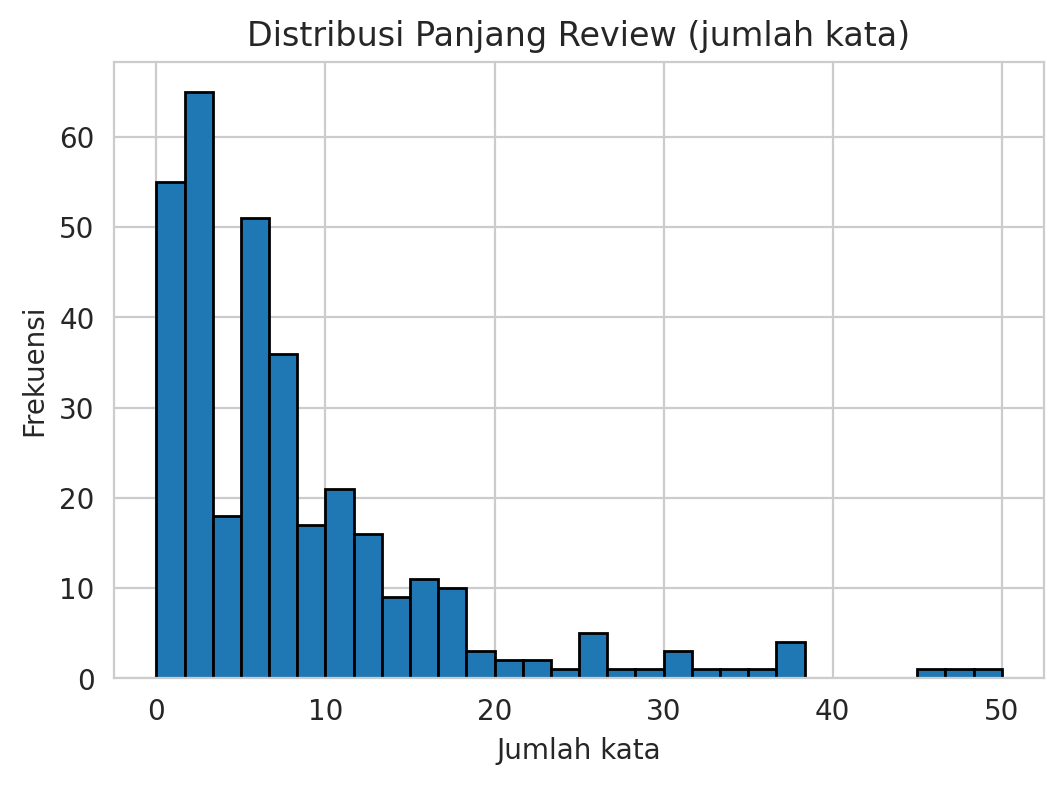

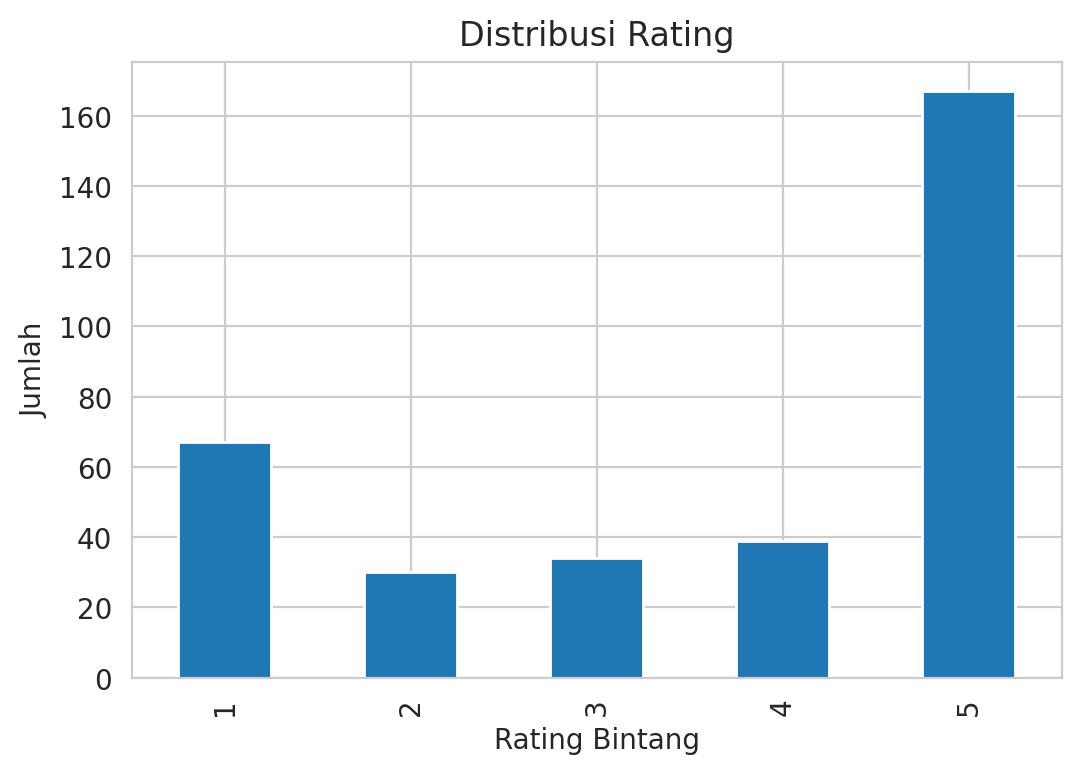

In [82]:
# EDA Basic ------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# cek ukuran data
print("Jumlah data:", df_transjog_clean.shape)
print("\nInfo dataset:")
print(df_transjog_clean.info())
print("\nCek missing value:")
print(df_transjog_clean.isnull().sum())

# distribusi panjang teks (jumlah kata per review)
df_transjog_clean["text_length"] = df_transjog_clean["final_text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
df_transjog_clean["text_length"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribusi Panjang Review (jumlah kata)")
plt.xlabel("Jumlah kata")
plt.ylabel("Frekuensi")
plt.show()

# distribusi rating
plt.figure(figsize=(6,4))
df_transjog_clean["score"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribusi Rating")
plt.xlabel("Rating Bintang")
plt.ylabel("Jumlah")
plt.show()



### Label positif/negatif/netral


Contoh data setelah diberi label:
   final_text  score sentiment
0       bantu      5  Positive
1      mantap      5  Positive
2  bantu baik      5  Positive
3      ngeleg      1  Negative
4       bantu      5  Positive

Jumlah per label sentiment:
sentiment
Positive    206
Negative     97
Neutral      34
Name: count, dtype: int64


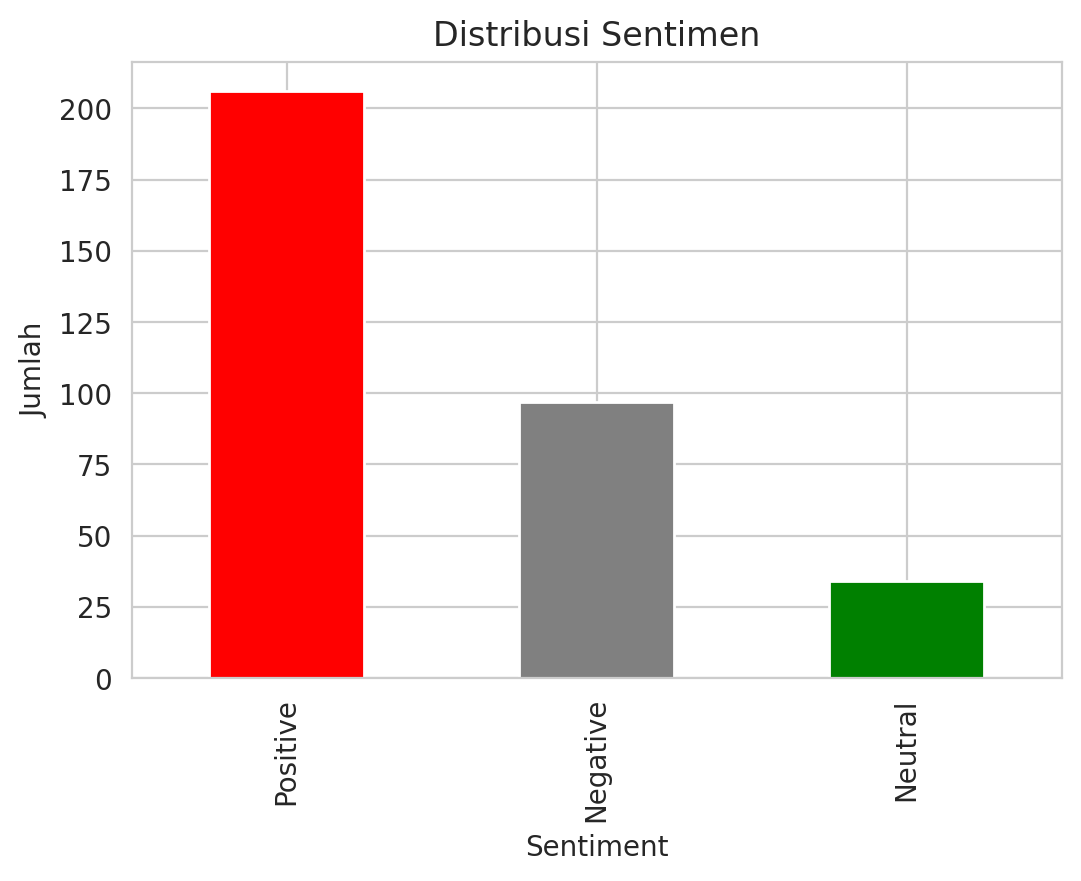

In [83]:
# ---------------- Tambah label sentimen ----------------
def label_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df_transjog_clean["sentiment"] = df_transjog_clean["score"].apply(label_sentiment)

print("\nContoh data setelah diberi label:")
print(df_transjog_clean[["final_text", "score", "sentiment"]].head())

# hitung total per label
sentiment_counts = df_transjog_clean["sentiment"].value_counts()
print("\nJumlah per label sentiment:")
print(sentiment_counts)

# distribusi label sentimen
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["red","gray","green"])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()


### CSV ada label

In [84]:
# rename kolom sentiment jadi clean_label
df_transjog_clean = df_transjog_clean.rename(columns={"sentiment": "score_label"})

# simpan ke csv baru
df_transjog_clean.to_csv("df_transjog_clean_label.csv", index=False)

print("CSV baru berhasil dibuat: df_transjog_clean_label.csv")
print(df_transjog_clean.head())


CSV baru berhasil dibuat: df_transjog_clean_label.csv
                   content  score  thumbsUpCount reviewCreatedVersion  \
0          sangat membantu      5              0                2.3.5   
1                    mntap      5              0                2.3.5   
2     membantu sekali baik      5              0                2.3.5   
3                   ngeleg      1              0                2.3.5   
4  sangat membantu sekali       5              0                2.3.5   

                   at replyContent repliedAt         content_cleaned  \
0 2025-09-21 11:44:22         None       NaT         sangat membantu   
1 2025-09-21 07:25:55         None       NaT                  mantap   
2 2025-09-21 05:03:59         None       NaT    membantu sekali baik   
3 2025-09-18 07:57:40         None       NaT                  ngeleg   
4 2025-09-17 16:08:37         None       NaT  sangat membantu sekali   

  content_cleaned_stopwords                      tokens      clean_tokens 

# FEATURE ENGINEERING

### Bag of Words (BOW)

Shape BoW: (337, 891)
Unique Words: ['ab' 'acu' 'ada' 'adat' 'adl' 'adu' 'ahmad' 'ajar' 'ak' 'akses'
 'aktivitas' 'akun' 'akurat' 'akutat' 'alaikum' 'alam' 'alamat' 'alas'
 'alhamdulillah' 'alhasil']


,ab,acu,ada,adat,adl,adu,ahmad,ajar,ak,akses,...,wifi,wisata,wkt,wkwk,wojo,work,worth,wr,yogyakarta,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



20 kata paling sering muncul:
bus            162
aplikasi        89
transjogja      88
bantu           65
rute            52
halte           47
jalur           37
baik            32
bagus           31
terimakasih     28
banget          27
jam             26
tunggu          25
tolong          25
error           24
jalan           23
posisi          20
mohon           18
pakai           16
fitur           16
dtype: int64


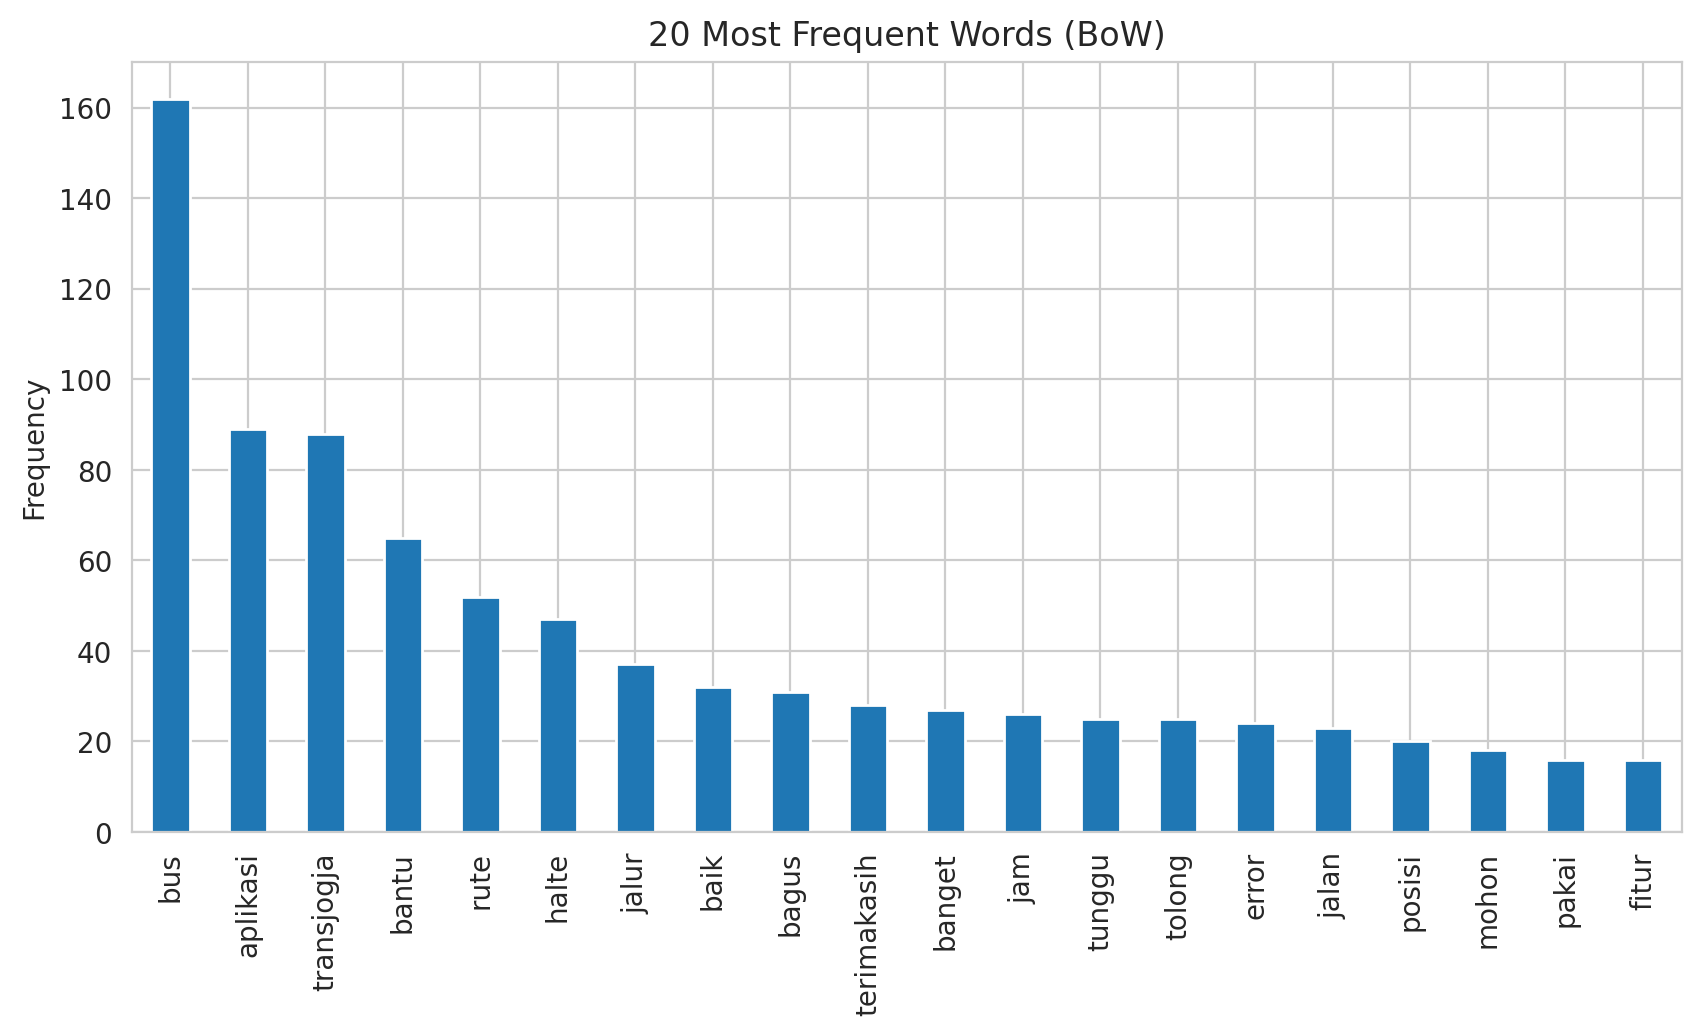

In [85]:
# ==================================
# Bag of Words setelah Lemmatization
# ==================================

from sklearn.feature_extraction.text import CountVectorizer

# misal kamu punya hasil preprocessing (udah lower, stopwords gone, lemma)
# simpen di list/series -> corpus
corpus = df_transjog["final_text"].astype(str).tolist()

# asumsinya 'corpus' udah berisi list teks hasil preprocessing (udah lowercase + lemmatize dll)
cv = CountVectorizer()
X_bow = cv.fit_transform(corpus)

# ubah jadi dataframe biar gampang dibaca
bow_df = pd.DataFrame(X_bow.toarray(), columns=cv.get_feature_names_out())

print("Shape BoW:", bow_df.shape)
print("Unique Words:", cv.get_feature_names_out()[:20])  # tampilkan 20 kata unik pertama

# tampilkan 5 row pertama
display(bow_df.head())

# ---------------- EDA kata paling sering ------------------
word_freq = bow_df.sum(axis=0).sort_values(ascending=False)

print("\n20 kata paling sering muncul:")
print(word_freq.head(20))

# plot top 20 kata
plt.figure(figsize=(10,5))
word_freq.head(20).plot(kind='bar')
plt.title("20 Most Frequent Words (BoW)")
plt.ylabel("Frequency")
plt.show()



## TF-IDF

Shape TF-IDF: (337, 891)


,ab,acu,ada,adat,adl,adu,ahmad,ajar,ak,akses,...,wifi,wisata,wkt,wkwk,wojo,work,worth,wr,yogyakarta,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sentence 1
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

Sentence 2
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

Sentence 3
  Sum of TF-IDF scores: 1.403698602283756
  Number of words: 2
  Average TF-IDF score: 0.701849301141878

Sentence 4
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

Sentence 5
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

20 kata dengan total TF-IDF tertinggi:
bantu         25.323221
bus           23.819872
aplikasi      17.460573
transjogja    16.219200
bagus         15.489009
dtype: float64


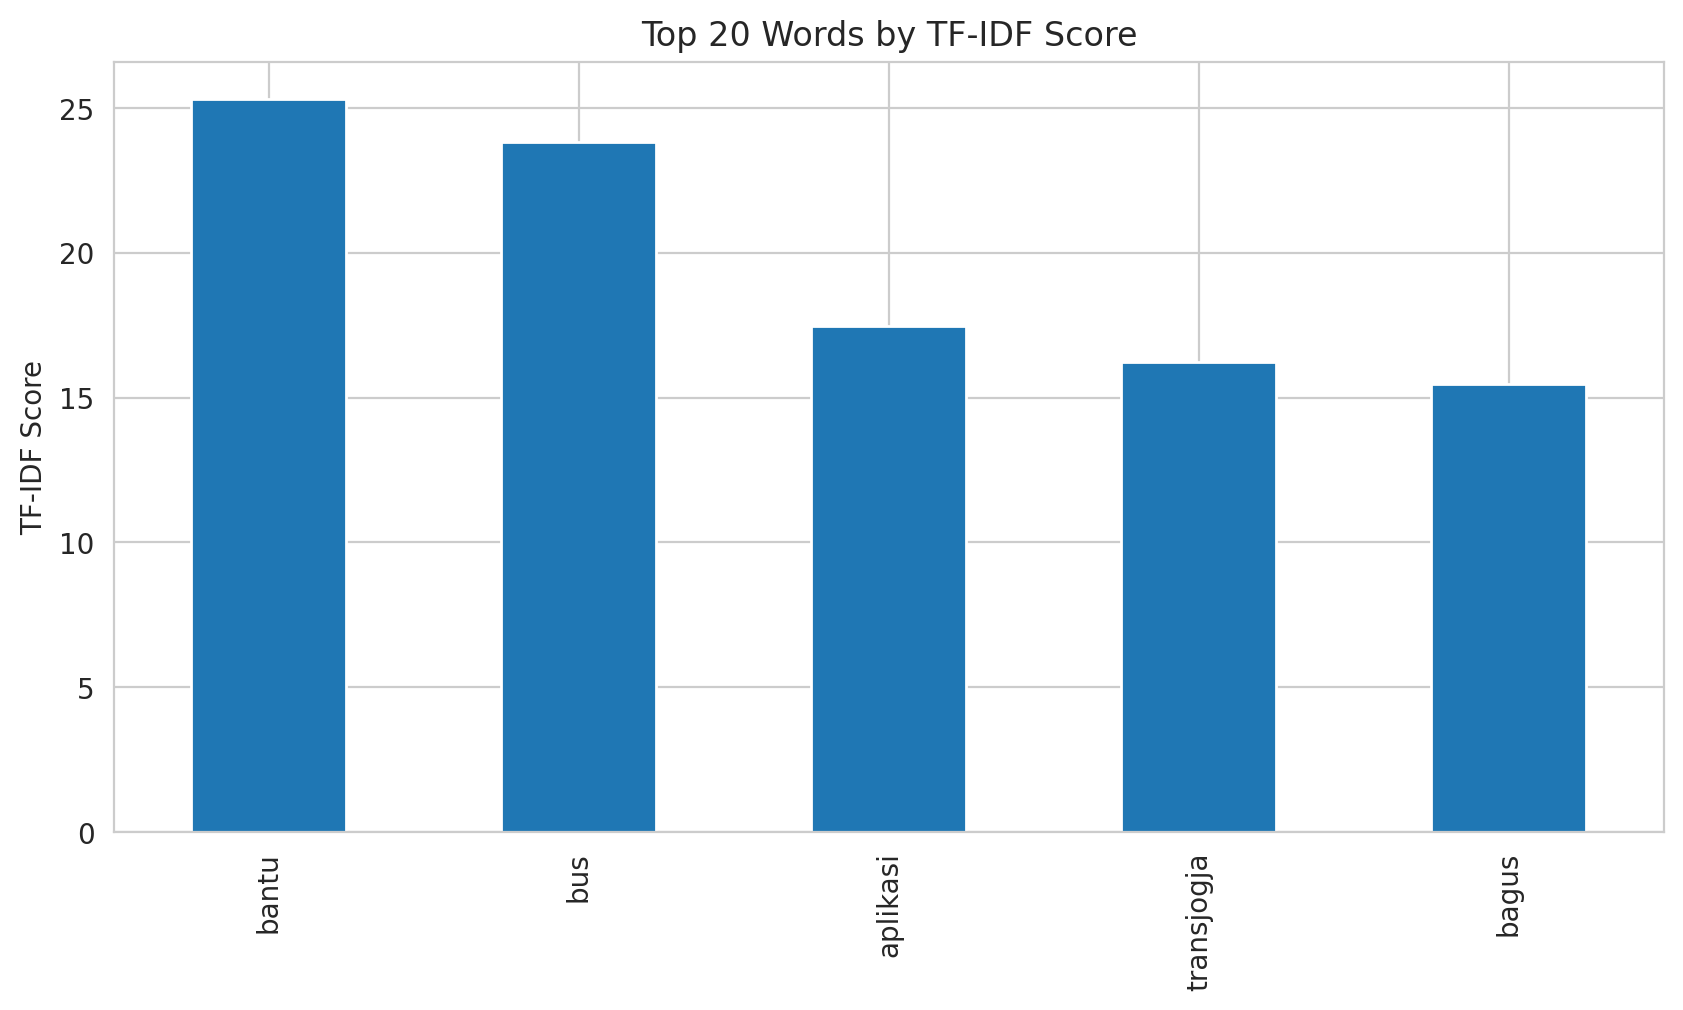

In [86]:
# TF-IDF ----------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# bikin TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)

# ubah ke dataframe biar rapi
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("Shape TF-IDF:", tfidf_df.shape)
display(tfidf_df.head())

# ---------------- Analisis per kalimat (sample 5) ----------------
sample_df = tfidf_df.head(5)   # ambil 5 kalimat pertama

for i, row in enumerate(sample_df.values):
    sum_score = row.sum()
    n_words = (row > 0).sum()   # jumlah kata non-zero di kalimat
    avg_score = sum_score / n_words if n_words > 0 else 0

    print(f"Sentence {i+1}")
    print(f"  Sum of TF-IDF scores: {sum_score}")
    print(f"  Number of words: {n_words}")
    print(f"  Average TF-IDF score: {avg_score}\n")


# ---------------- Top kata berdasarkan skor total TF-IDF ----------------
word_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

print("20 kata dengan total TF-IDF tertinggi:")
print(word_tfidf.head(5))

plt.figure(figsize=(10,5))
word_tfidf.head(5).plot(kind='bar')
plt.title("Top 20 Words by TF-IDF Score")
plt.ylabel("TF-IDF Score")
plt.show()
